<a href="https://www.kaggle.com/code/abdalrhamnhebishy/diapetest-project-iti-final-project?scriptVersionId=195338043" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from IPython.core.display import HTML
# Apply styles globally within the notebook
HTML('''
<style>
  h2 {
    font-size: var(--j3p-content-font-size4);
    background-color:#00FFFF  ;
    color: white;
    display: flex;
    align-items: center;
    justify-content: center;
    padding: 10px 41px;
    top: 10px;
    position: relative;
    border-radius: 10px 50px 10px 50px;
}

 img {       /* flex-grow: 1; */
            /* flex-shrink: 1; */
            border-radius: 100px 70px 150px 70px; 
            border: 10px solid #eee;
            display: flex;
            align-items: center;
            justify-content: center;
            transition: box-shadow 0.3s ease; /* Add a transition for a smooth effect */
        }

       img:active {
          box-shadow: 0 10px 20px rgba(255, 255, 0, 0.5), 0 6px 6px rgba(215, 215, 0, 0.5);
        }
</style>
''')        

## Diabetes Prediction 

<img src="https://ncdalliance.org/sites/default/files/Diabetes_graph.png" alt="My Image">

## Table of Contents 

<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

   
    
    
<p> &bull;        <a target="_blank"> Introudction</a>  </p> 

<p> &bull;      <a target="_blank"> Explantory Data Analysis</a>  </p>

<p>&bull;       <a target="_blank"> Data Processing</a>  </p>

<p>&bull;       <a target="_blank"> Model Bulding</a> </p>   
    
<p>&bull;       <a target="_blank"> Evalution Metrics </a> </p> 

<p>&bull;       <a target="_blank"> Results & see the best models </a> </p>   

</div>

## Data Information

<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">


<p>&bull; This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. </p> 

<p>&bull; The objective is to predict based on diagnostic measurements whether a patient has diabetes  </p>

<p>&bull; this Data Download from the Kaggle .    </p>

<p>&bull; Several constraints were placed on the selection of these instances from a larger database.</p> 

<p>&bull; In particular, all patients here are females at least 21 years old of Pima Indian heritage.</p>
    
</div>

## Dataset Features

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| Pregnancies            | Number of times pregnant                                                                                      |
| Glucose          | Plasma glucose concentration a 2 hours in an oral glucose tolerance test                                                                                       |
| BloodPressure                      | Diastolic blood pressure (mm Hg)                                                                              |
| SkinThickness           | Triceps skin fold thickness (mm)                                                                                          |
| Insulin               | 2-Hour serum insulin (mu U/ml)                                                                                |
| BMI        |  Body mass index (weight in kg/(height in m)^2)y.                                                                               |
| DiabetesPedigreeFunction               | Diabetes pedigree function                                                                                |
| Age            | Age (years)                                                                          |
| Outcome            | Class variable (0 or 1)                                                                      |


## Understand the problem :








<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

<p> &bull; This problem Consider as Binary Classification   .</p> 

<p> &bull; Target of this problem to predict & classifiy if the person has Diabetes  or not (1 or 0)  .</p> 


<p> &bull; I will Train 5 models for Machine learning with visualization of them. (K-Nearest Neighbors (KNN),Random Forest                              Classiﬁer),Decision Tree Classiﬁer, Logistic Regression,Naive Bayes  .</p> 

<p> &bull; Also i will Train Artifical Neural Network model (ANNs) and Evalution Metrics for it . </p>

<p> &bull; About Regression: Our Target Feature is DiabetesPedigreeFunction  .</p> 

<p> &bull; I will Train 5 models for Machine learning with visualization of them. (K-Nearest Neighbors (KNN),Random Forest                              Regressor),Decision Tree Regressor, LinearRegression,Naive Bayes  .</p> 

<p>&bull; Also i will Make Explanory Analysis for the Data By using both SQL & Pandas  </p>

<p>&bull; Also i will learn the Relations between the Feature to  Make Different Plots that Represent the Data  </p>   
    
</div>

## Import Libararies 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.feature_selection import VarianceThreshold ,f_classif ,SelectKBest
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.datasets import make_regression,make_classification
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix ,ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import sqlite3
from plotly.graph_objs import *
import plotly.express as px 

In [3]:
# load the Data:

data=pd.read_csv("diabetes.csv")
data.head(15)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1

## Explore the Data 

In [4]:
#get info about the dataset:
print(data.info())
print("-"*25)
# to know more about the shape of the dataset:
print("shape of the dataset -->>",np.shape(data))


<class 'pandas.core.frame.DataFrame'>

RangeIndex: 768 entries, 0 to 767

Data columns (total 9 columns):

 #   Column                    Non-Null Count  Dtype  

---  ------                    --------------  -----  

 0   Pregnancies               768 non-null    int64  

 1   Glucose                   768 non-null    int64  

 2   BloodPressure             768 non-null    int64  

 3   SkinThickness             768 non-null    int64  

 4   Insulin                   768 non-null    int64  

 5   BMI                       768 non-null    float64

 6   DiabetesPedigreeFunction  768 non-null    float64

 7   Age                       768 non-null    int64  

 8   Outcome                   768 non-null    int64  

dtypes: float64(2), int64(7)

memory usage: 54.1 KB

None

-------------------------

shape of the dataset -->> (768, 9)


In [5]:
#get the statistical:
data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [6]:
# get Types of features:

data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
# know the number of every item in every column:

for col in data.columns:
    print(f"counts of items in {col} -->> \n {data[col].value_counts()}")
    print("-"*25)

counts of items in Pregnancies -->> 

 Pregnancies

1     135

0     111

2     103

3      75

4      68

5      57

6      50

7      45

8      38

9      28

10     24

11     11

13     10

12      9

14      2

15      1

17      1

Name: count, dtype: int64

-------------------------

counts of items in Glucose -->> 

 Glucose

99     17

100    17

111    14

129    14

125    14

       ..

191     1

177     1

44      1

62      1

190     1

Name: count, Length: 136, dtype: int64

-------------------------

counts of items in BloodPressure -->> 

 BloodPressure

70     57

74     52

78     45

68     45

72     44

64     43

80     40

76     39

60     37

0      35

62     34

66     30

82     30

88     25

84     23

90     22

86     21

58     21

50     13

56     12

52     11

54     11

75      8

92      8

65      7

85      6

94      6

48      5

96      4

44      4

100     3

106     3

98      3

110     3

55      2

108     2

104     2

46      2

3

In [8]:
# to know the uniques values in evey column in the dataset:
for col in data.columns:
    print(f"All items in the ---->>>{col} column  :  \n{data[col].unique()}")
    print("*"*50)

All items in the ---->>>Pregnancies column  :  

[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]

**************************************************

All items in the ---->>>Glucose column  :  

[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107

 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90

 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114

  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93

 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153

 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193

 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186

 198 121  67 174 199  56 169 149  65 190]

**************************************************

All items in the ---->>>BloodPressure column  :  

[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76

  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 1

In [9]:
# Extract all Types of columns from the data :
for col in data.columns:
    obj_cols=data.select_dtypes("object").columns

    num_cols=data.select_dtypes("number").columns

    disc_cols=data.select_dtypes(include=("int64")).columns

    conts_cols=data.select_dtypes(include=("float64")).columns

    Nomial_cols=data.nunique()[data.nunique()<3]

print(f"object_columns ----->>> {obj_cols}\n Numerical_columns ----->>> {num_cols} \n Discrete_columns ---->>> {disc_cols} \n Continous_cols ----->> {conts_cols} \n Nominal Columns --->> {Nomial_cols}")

object_columns ----->>> Index([], dtype='object')

 Numerical_columns ----->>> Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',

       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],

      dtype='object') 

 Discrete_columns ---->>> Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',

       'Age', 'Outcome'],

      dtype='object') 

 Continous_cols ----->> Index(['BMI', 'DiabetesPedigreeFunction'], dtype='object') 

 Nominal Columns --->> Outcome    2

dtype: int64


## Cleaning :














<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

<p> &bull; At First i checked if ound any Null Values . </p> 

<p> &bull; I used the Simple Imputer Method to fill the Null Values . </p> 

<p> &bull; I used median Strategy with Numerical Features  .</p> 

<p> &bull; I make Reshape , then i make squeeze on it  . </p>


</div>

## Cleaning  The Data & Remove the unless Features :

In [10]:
# check the Null Values :
# ok there no Any Null values :
data.isna().mean()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [11]:
# fill any null values if found  :

for col in data.select_dtypes("number").columns:
    imputer = SimpleImputer(missing_values=np.nan, strategy="median")
    imputed_values = imputer.fit_transform(data[col].values.reshape(-1, 1))
    data[col] = np.squeeze(imputed_values)
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            0.0      0.0  30.1   
767          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0      1.0  
1                       0.351  31.0      0.0  
2                       0.672  32.0      1.0  
3                       0.167  21.0      0.0  
4                       2.288  33.0      1.0  
..                        ...   ...      ...  
763                     0.171  63.0      0.0  
764                     0.340  27.0      0.0  
765                     0.245  30.0      0.0  
766                     0.349  47.0      1.0  
767                     0.315  23.0      0.0  

[768 rows x 9 columns]

In [12]:
# Check if there are aduplicated values in the data & drop it if found :
df=data
duplicated_features=df.duplicated().sum()
print("Number of duplicates ----->>> ",duplicated_features)
df = df.drop_duplicates()
duplicated_features=df.duplicated().sum()
print("Number of duplicates of cleaning it ----->>> ",duplicated_features)

Number of duplicates ----->>>  0

Number of duplicates of cleaning it ----->>>  0


## SQL Analysis :

In [13]:
# Connect to the database
conn = sqlite3.connect('diapetest.db')

# Create a cursor object
cursor = conn.cursor()

# Check if the table 'insurance1' exists
cursor.execute("""
SELECT * FROM sqlite_master WHERE type='table' AND name='DB';
""")
table_exists = cursor.fetchone()

# Create the table only if it does not exist
if not table_exists:
    # Assuming 'data' is your pandas DataFrame
    data.to_sql("DB", conn, if_exists='fail')  # 'fail' will raise a ValueError if the table already exists
else:
    print("The table 'DB' already exists. Skipping table creation.")

The table 'DB' already exists. Skipping table creation.


In [14]:
df = pd.read_sql("SELECT * FROM DB", conn)
df.drop(columns="index",axis=1)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            0.0      0.0  30.1   
767          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0      1.0  
1                       0.351  31.0      0.0  
2                       0.672  32.0      1.0  
3                       0.167  21.0      0.0  
4                       2.288  33.0      1.0  
..                        ...   ...      ...  
763                     0.171  63.0      0.0  
764                     0.340  27.0      0.0  
765                     0.245  30.0      0.0  
766                     0.349  47.0      1.0  
767                     0.315  23.0      0.0  

[768 rows x 9 columns]

## SQL Queries :














<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

<p> &bull; I make some Queries to Deep more in the Data to Answer on the Client Questions. </p> 

<p> &bull; Also i used it As There Some Complex Questions that i cant Answer it using Pandas  .</p> 

<p> &bull; Finally , I used it As it Extract Answers from the Relational Questions   .</p> 


</div>

In [15]:
# Q1: how many of paients  That Glucose Rate bigger than 183.0 ?   :

print("=== Number OF paients That Glucose Rate bigger than 183.0 === ")
R1=cursor.execute("SELECT COUNT(OUTCOME) FROM db  WHERE   OUTCOME=1 AND GLUCOSE >183  ")
print(R1.fetchall())

print("-"*50)

# Q2: how many of paients whos ages between 20,30 & BloodPressure bigger than 70 ?

print("===  Number paients whos ages between (20,30) & BloodPressure bigger than 70 === ")
R2=cursor.execute("SELECT COUNT(OUTCOME) FROM DB  WHERE OUTCOME=1 AND BLOODPRESSURE >70 AND AGE BETWEEN 20 AND 30   ")
print(R2.fetchall())

print("-"*50)

# Q3 :how many of paients whose Pregnancies rate is 6 and Insulin is zero  ?


R3=cursor.execute("""
SELECT COUNT(OUTCOME)
FROM DB 
WHERE OUTCOME=1 AND PREGNANCIES=6 AND INSULIN = 0
""")
print("===Number of paients whose Pregnancies rate is 6 and Insulin is zero  === \n ",R3.fetchall())

print("-"*50)

# Q4 :how many of paients   that SkinThickness between (0 ,20)  ?

R4=cursor.execute("""
SELECT COUNT(OUTCOME)
FROM DB 
WHERE  OUTCOME=1 AND SKINTHICKNESS BETWEEN 0 AND 20  
""")
print("=== Number of paients that SkinThickness between (0 ,20)  === \n",R4.fetchall())

print("-"*50)

# Q5 :whats Maximum and Minimum of BMI FOR un paient persons   ?

R5=cursor.execute("""
SELECT MAX(BMI),MIN(BMI)
FROM DB 
WHERE  OUTCOME=0  
""")
print("=== Maximum and Minimum of BMI FOR unpaient persons  === \n",R5.fetchall())

print("-"*50)






=== Number OF paients That Glucose Rate bigger than 183.0 === 

[(27,)]

--------------------------------------------------

===  Number paients whos ages between (20,30) & BloodPressure bigger than 70 === 

[(38,)]

--------------------------------------------------

===Number of paients whose Pregnancies rate is 6 and Insulin is zero  === 

  [(12,)]

--------------------------------------------------

=== Number of paients that SkinThickness between (0 ,20)  === 

 [(105,)]

--------------------------------------------------

=== Maximum and Minimum of BMI FOR unpaient persons  === 

 [(57.3, 0.0)]

--------------------------------------------------


## Explantory on Dataset: 




<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

<p> &bull; Contex : </p> 

<p> &bull; Correlation : I make correlation to study Relations between features </p> 

<p> &bull; outliers : Defination outliers and check on each feature   .</p> 

<p> &bull; Anova , i make some Stastical Anova test  .</p> 

<p> &bull; heatmap : very strong plot that show the Strong / week Relations between features   .</p> 
</div>

In [16]:
# VaraianceThreshold:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))

VarianceThreshold(threshold=0.01)

In [17]:
class Var_Selector(BaseEstimator,TransformerMixin):

    def __init__(self,num_cols):
        self.num_cols=None
    def fit(self,data):
        self.num_cols=data.select_dtypes("number").columns
        return self
    def transform(self,data):
        selector=VarianceThreshold(threshold=0.01)
        selector.fit(data[self.num_cols])

        removed_cols=[column for column in self.num_cols if column not in \
                     self.num_cols[selector.get_support(indices=True)]]
        data=data.drop(columns=removed_cols)

        # remove high-low cardinality categorical:-

        removed_cols=data.nunique()[((data.nunique()==1)|data.nunique()==len(data))].index

        return data.drop(columns=removed_cols)

In [18]:
transform=Var_Selector(data)
transform.fit_transform(data)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            0.0      0.0  30.1   
767          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0      1.0  
1                       0.351  31.0      0.0  
2                       0.672  32.0      1.0  
3                       0.167  21.0      0.0  
4                       2.288  33.0      1.0  
..                        ...   ...      ...  
763                     0.171  63.0      0.0  
764                     0.340  27.0      0.0  
765                     0.245  30.0      0.0  
766                     0.349  47.0      1.0  
767                     0.315  23.0      0.0  

[768 rows x 9 columns]

In [19]:
# Calculate the correlation :

corr=data.select_dtypes("number").corr()
corr

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

Text(0.5, 1.0, 'Correlation_heatmap_Matrix')

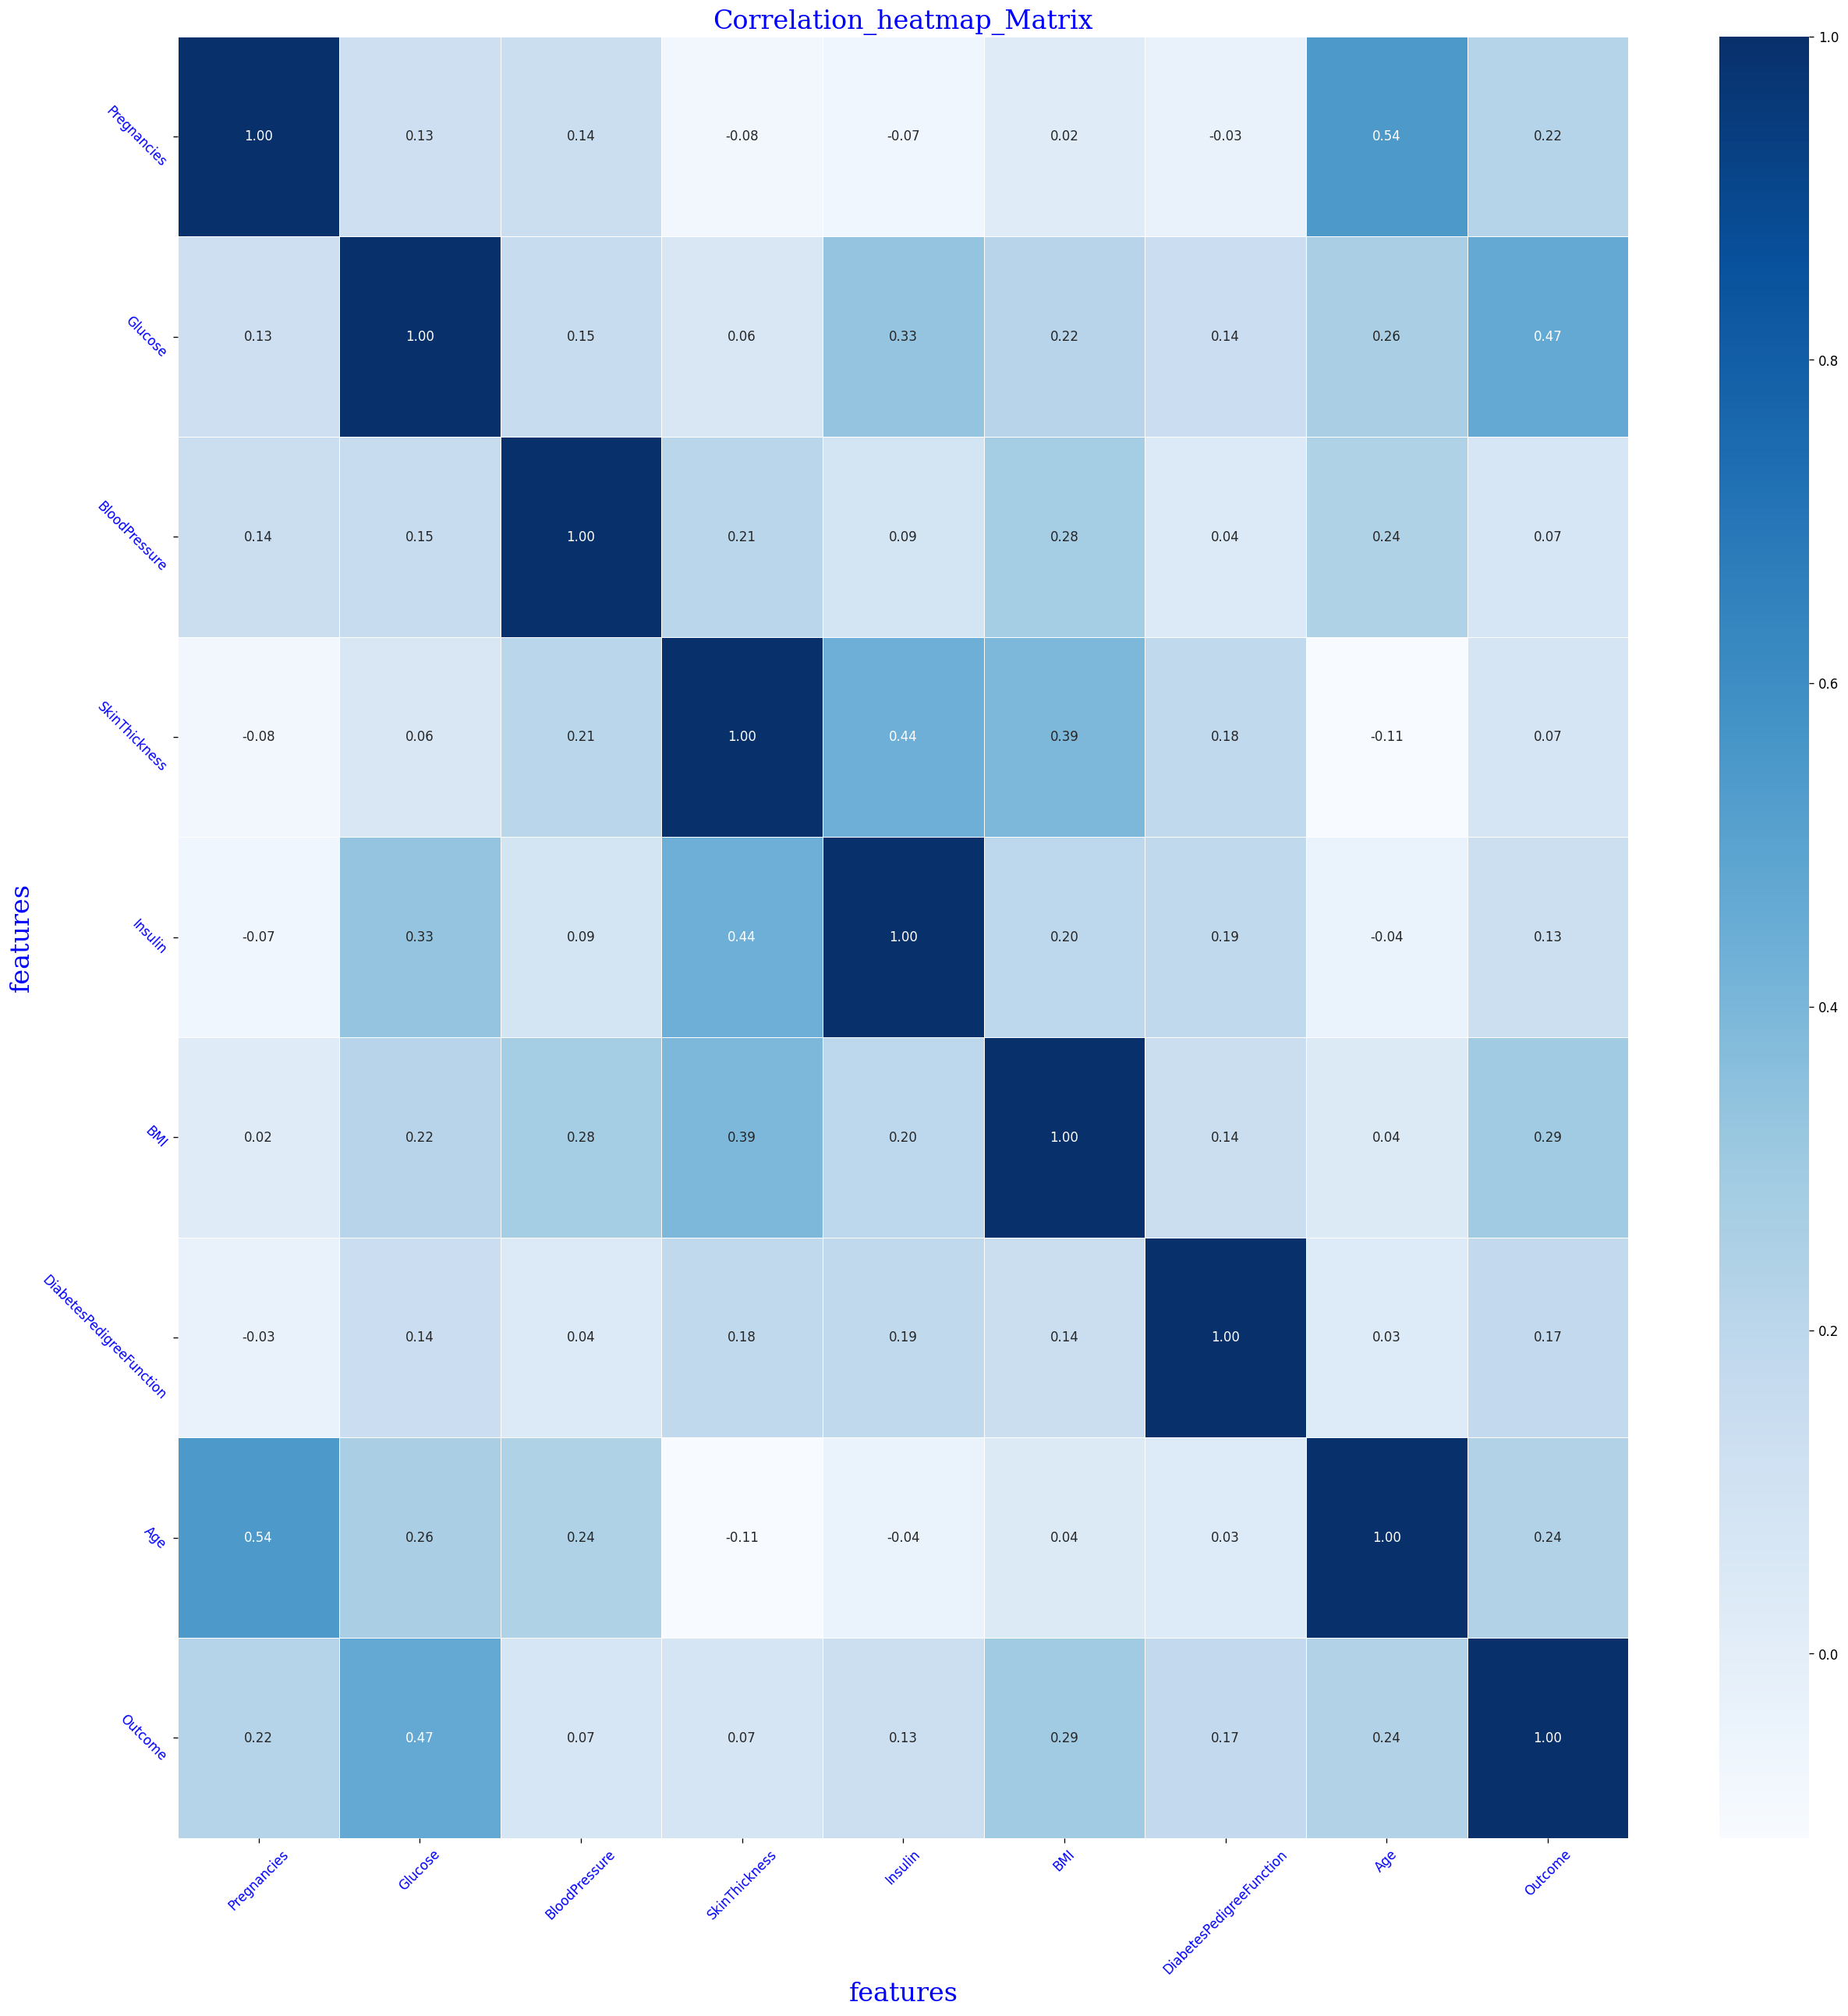

In [20]:
# plot the heatmap:
# plot the heatmap_Correlation_MatRix:
f1={"family":"serif","size":20,"color":"b"}
plt.figure(figsize=(25,25),dpi=120)
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.2f",cmap='Blues',linewidths=0.5)
plt.xticks(rotation=45,color="b")
plt.yticks(rotation=-45,color="b")
plt.xlabel("features",fontdict=f1)
plt.ylabel("features",fontdict=f1)
plt.title("Correlation_heatmap_Matrix",fontdict=f1)

## Defination Outliers :

In [21]:
# found many feature contain the outliers  :
features=data.select_dtypes(include="number").columns

for col in features:
    Q1_col,Q3_col=data[col].quantile([0.25,0.75])
    iqr=Q3_col-Q1_col
    low_limit=Q1_col-1.5*iqr
    upper_limit=Q3_col+1.5*iqr
    outlier=[]
    for x in data[col]:
         if ((x> upper_limit) or (x<low_limit)):
             outlier.append(x)
    if len(outlier)==0:
        print(f" * -- >> there No outlier in {col} feature")
    else:
        print(f"Ther outlier in this feature {col}")

    print(f"Q1 of {col} --->>> {Q1_col} \n Q3 of {col} ---->>> {Q3_col} \n iqr--->>{iqr}\n low_limit--->>>{low_limit} \n  upper_limit--->>> {upper_limit} \n outlier---->>> {outlier} \n Number of outliers --->>> {len(outlier)}")
    print("-"*25)

Ther outlier in this feature Pregnancies

Q1 of Pregnancies --->>> 1.0 

 Q3 of Pregnancies ---->>> 6.0 

 iqr--->>5.0

 low_limit--->>>-6.5 

  upper_limit--->>> 13.5 

 outlier---->>> [15.0, 17.0, 14.0, 14.0] 

 Number of outliers --->>> 4

-------------------------

Ther outlier in this feature Glucose

Q1 of Glucose --->>> 99.0 

 Q3 of Glucose ---->>> 140.25 

 iqr--->>41.25

 low_limit--->>>37.125 

  upper_limit--->>> 202.125 

 outlier---->>> [0.0, 0.0, 0.0, 0.0, 0.0] 

 Number of outliers --->>> 5

-------------------------

Ther outlier in this feature BloodPressure

Q1 of BloodPressure --->>> 62.0 

 Q3 of BloodPressure ---->>> 80.0 

 iqr--->>18.0

 low_limit--->>>35.0 

  upper_limit--->>> 107.0 

 outlier---->>> [0.0, 0.0, 30.0, 110.0, 0.0, 0.0, 0.0, 0.0, 108.0, 122.0, 30.0, 0.0, 110.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 108.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 110.0, 0.0, 24.0, 0.0, 0.0, 0.0, 0.0, 114.0, 0.0, 0.0, 0.0] 

 Number of outliers

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


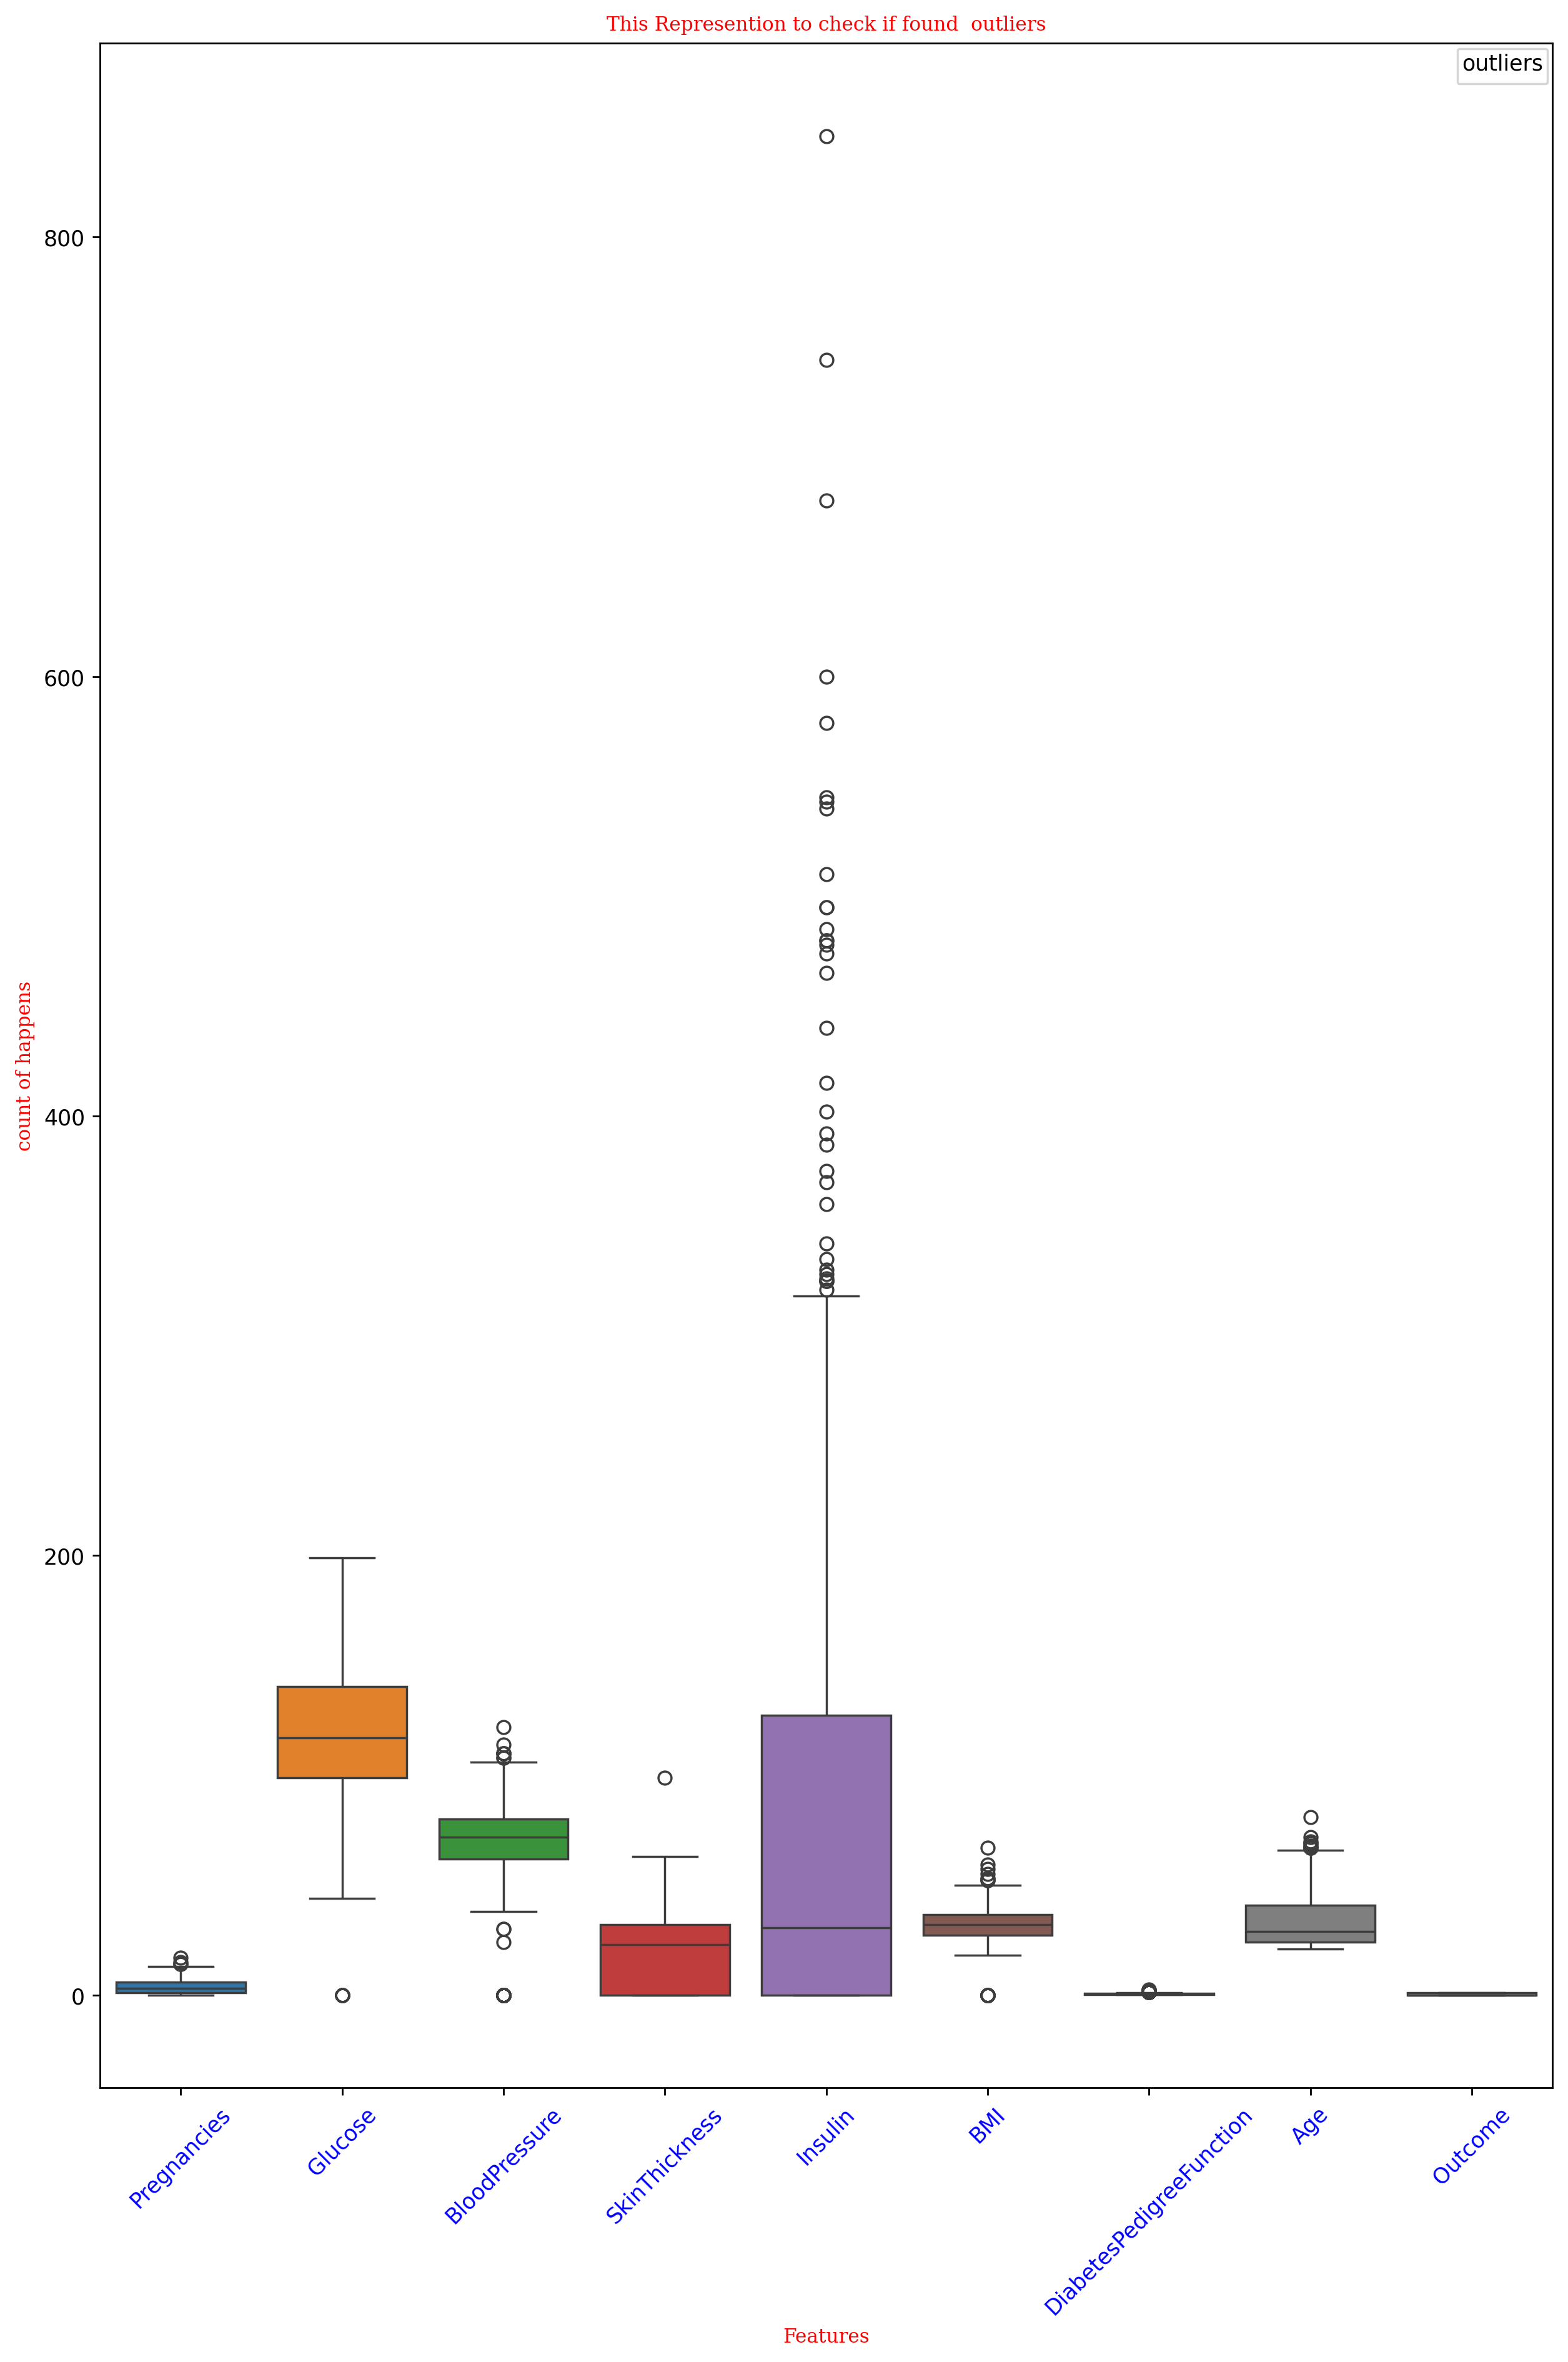

In [22]:
# from this Represention we discover that we found outlier in the  Anematic Feature :
f1={"family":"serif","size":9,"color":"r"}
plt.figure(figsize=(12,17),dpi=250)
plt.title("This Represention to check if found  outliers",fontdict=f1)
plt.xlabel("Features",fontdict=f1)
plt.ylabel("count of happens",fontdict=f1)
plt.xticks(rotation=45,color="b")
sns.boxplot(data[features])
plt.legend(title="outliers",prop={'size': 5})

upper_limit :  68.52158003870272

lower_limit :  -2.0398092053693873

Mean Value :  33.240885416666664

Median Value :  29.0

1st Standard Deviation :  11.760231540678685


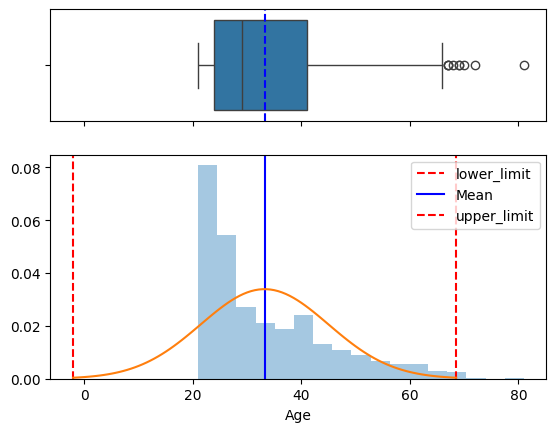

In [23]:
#calculate outlier on Age feature:-
# We can see that Distibution in this feature follow Standard Normal Distribution N -> (0,1)

from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

mean=data.Age.mean()
std = data.Age.std()
median = data.Age.median()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(x=data["Age"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(data["Age"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()

## Visualization :

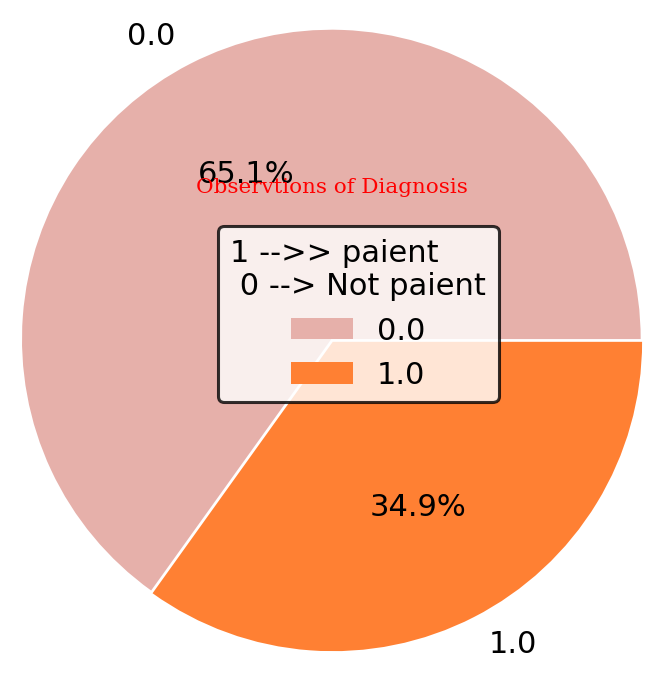

In [24]:
# Font style for titles
f1 = {"family": "serif", "size": 7, "color": "r"}

# Create a figure with a specified size and DPI
plt.figure(figsize=(7, 7), dpi=220)

# Create the first subplot
Outcome = data["Outcome"].value_counts()


plt.subplot(4, 4, 1)  
plt.title("Observtions of Diagnosis", fontdict=f1)

# Plot the pie chart :
plt.pie(
    x=Outcome,  
    labels=Outcome.index,  
    colors=["#E6B0AA","#FF8033"],
    explode=[0.01, 0.02],
    autopct='%1.1f%%',
    radius=3,
)

plt.legend(loc='upper left', title="1 -->> paient \n 0 --> Not paient",facecolor='white', edgecolor='black')


## Waffle Visualization :














<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

<p> &bull; i Make Waffle observation to see which feature that Controlled on other Features . </p> 

<p> &bull; i found Glucose Feature controled on other features .</p> 

<p> &bull; Finally , Glucose Feature : is the most important Feature in the Data   .</p> 


</div>

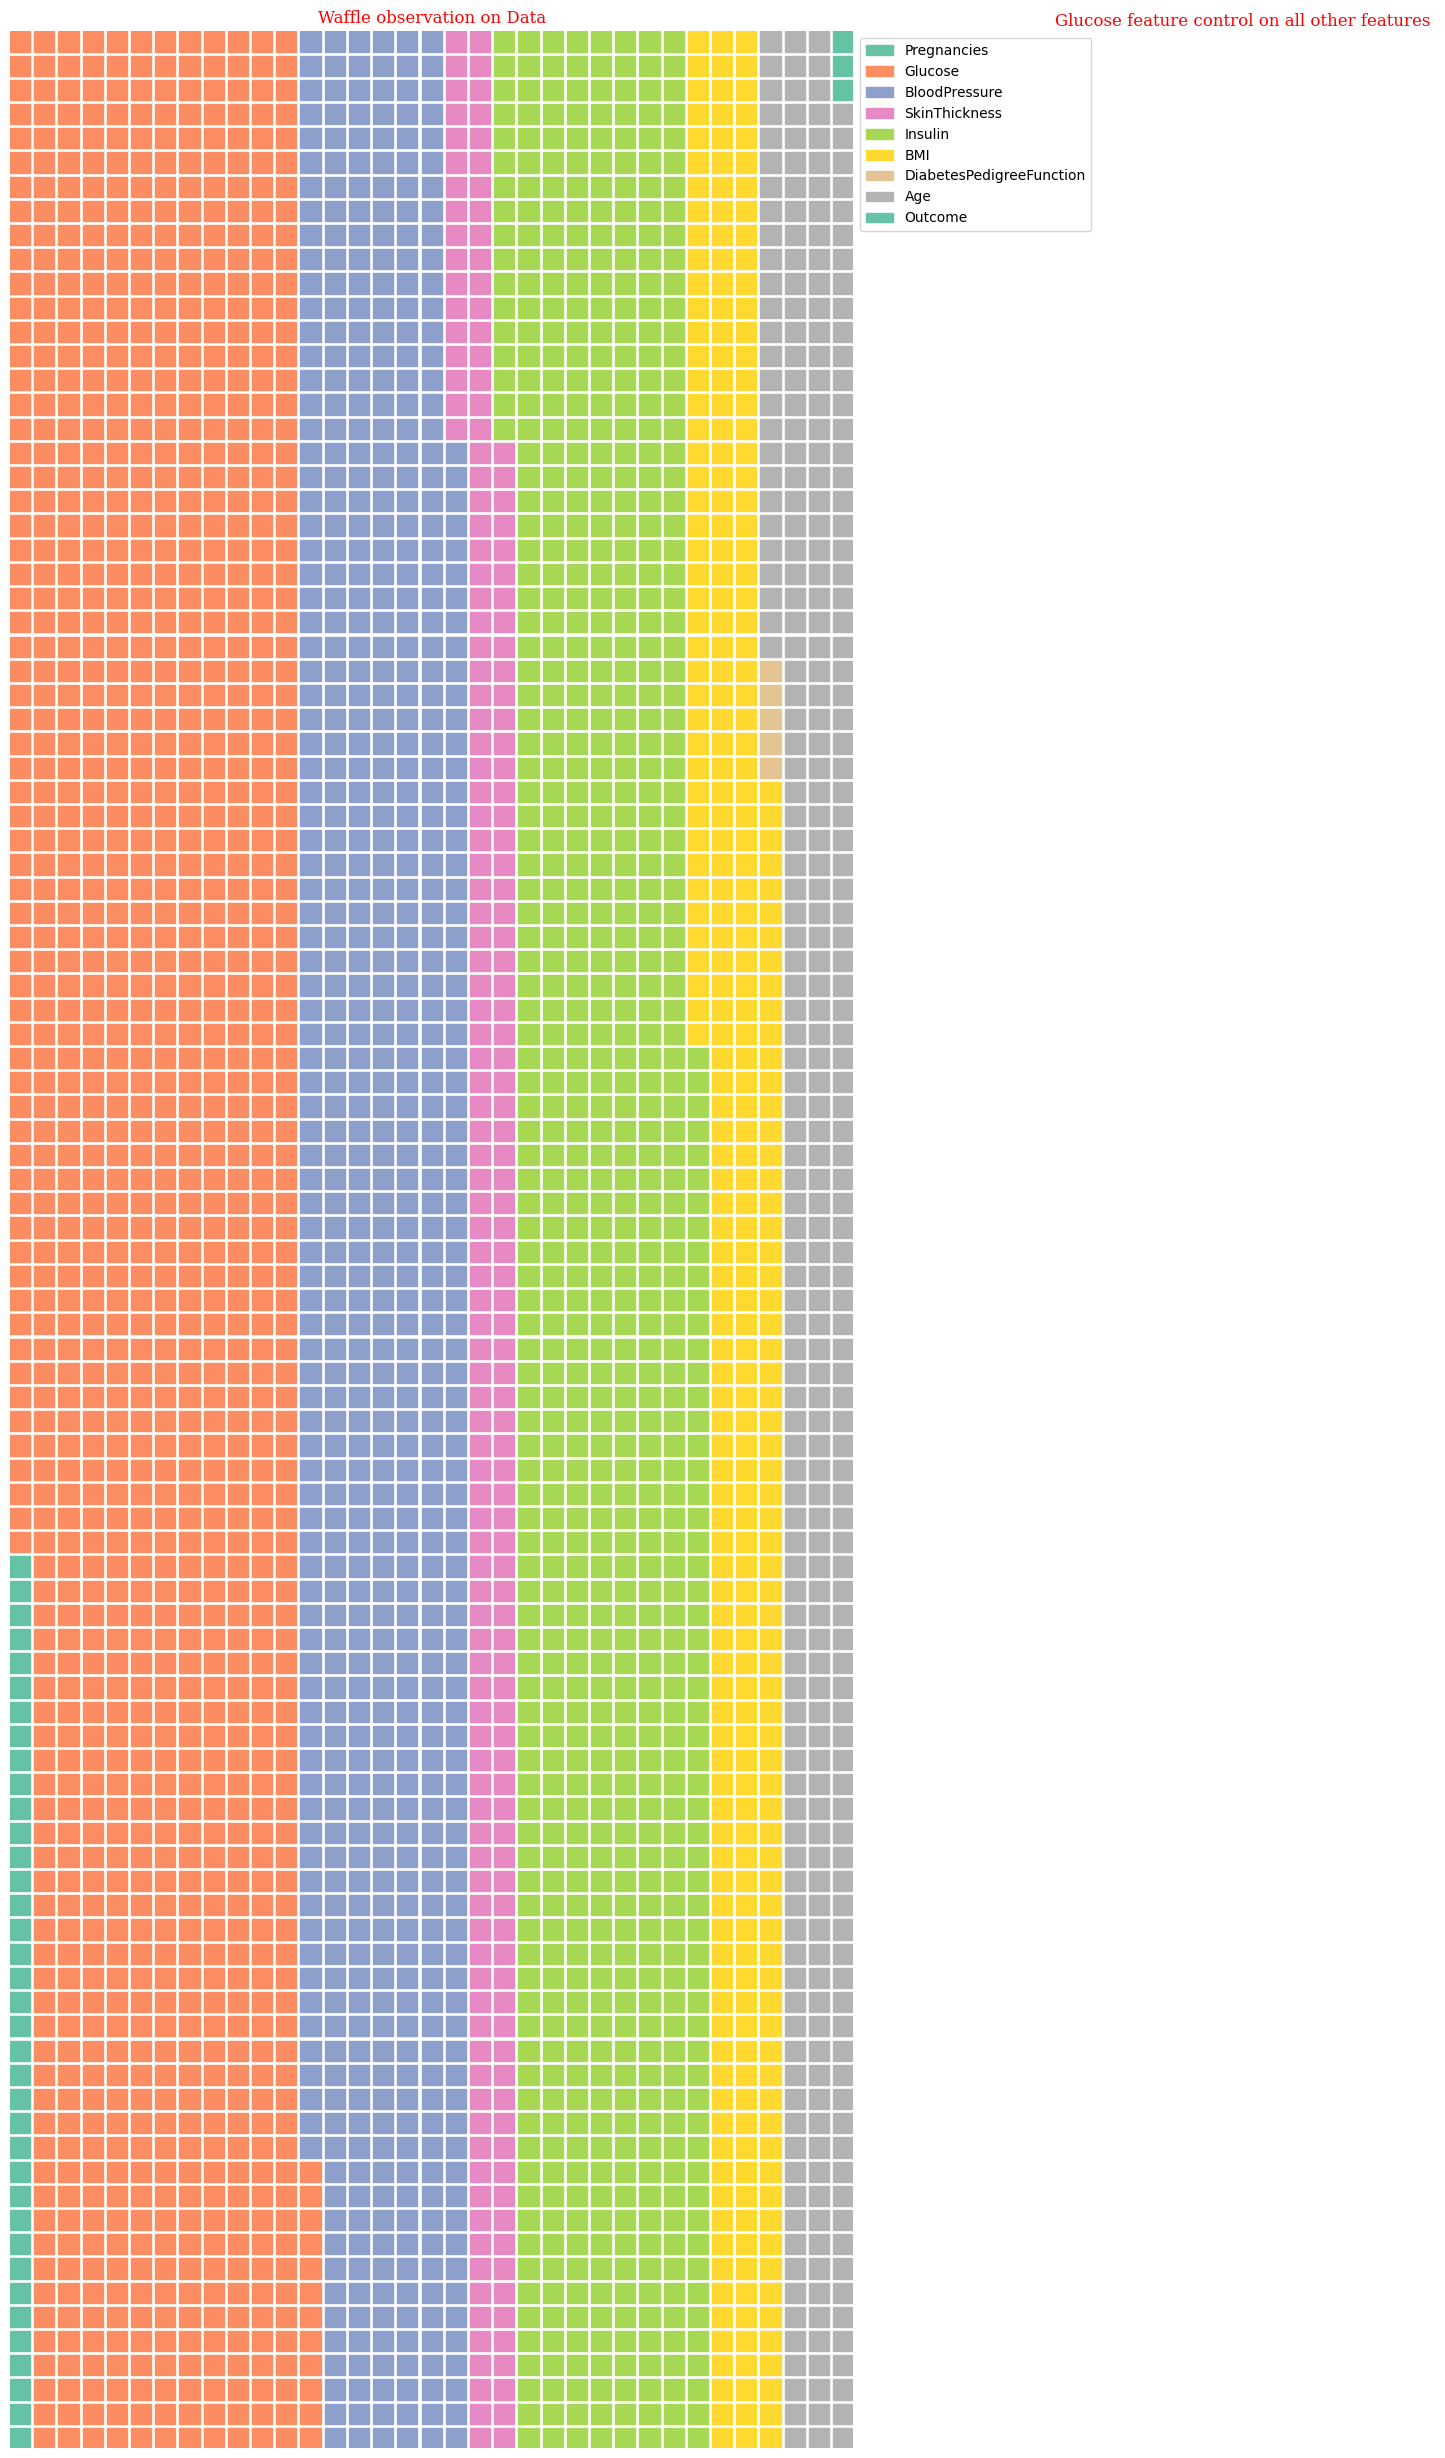

In [25]:
# Make a waffel for the Data:
# from this waffle i see which Feature is a controled on other features : 


f2 = {"family": "serif", "size": 12, "color": "r"}

from pywaffle import Waffle

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
values = data[numeric_columns].sum().tolist()

fig = plt.figure(
    FigureClass=Waffle,
    rows=100,
    columns=35,
    values=values,
    legend={'labels': numeric_columns.tolist(),
            'loc': "upper left",
            'bbox_to_anchor': (1, 1)},
    figsize=(25, 25)
)
plt.title("Waffle observation on Data",fontdict=f2)
plt.suptitle("Glucose feature control on all other features ",fontdict=f2)
plt.show()

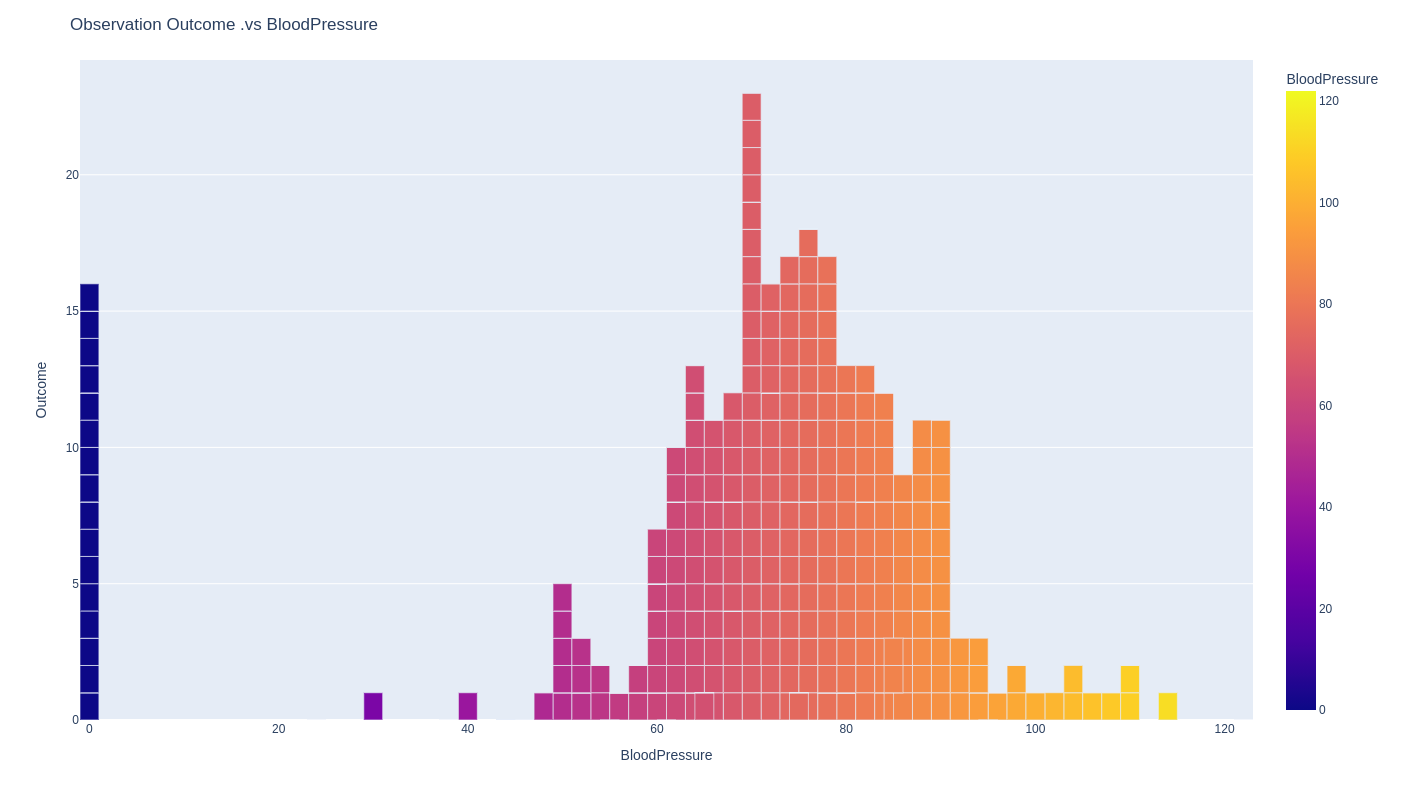

In [26]:
# Outcome.vs BloodPressure : 

color_palette = ['#8B008B', '#1E90FF', '#FF6347', '#B22222', '#228B22', '#2F4F4F']
fig = px.bar(data, x='BloodPressure', y='Outcome', color='BloodPressure', color_discrete_sequence=color_palette)
fig.update_layout(
       title="Observation Outcome .vs BloodPressure ", 
       
       xaxis_title="BloodPressure",
       
        yaxis_title="Outcome",
        width=1200,
       height=800,
       barmode='group')

# Update the bar width
fig.update_traces(width=2)
fig.show()


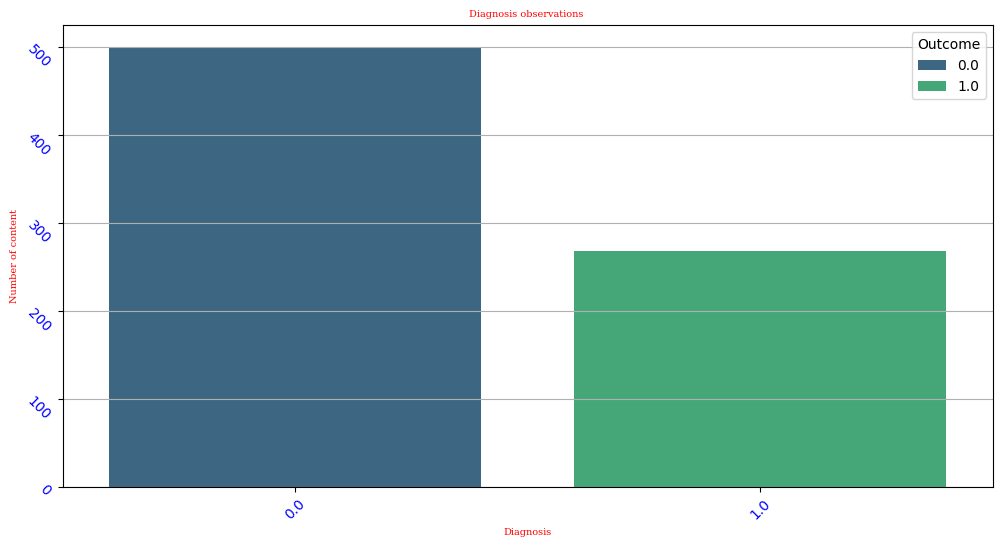

In [27]:
# plot the  : 

color_palette = ['green', 'darkgreen']
diag = data['Outcome'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=diag.index, y=diag.values,hue=diag.index,palette="viridis")
plt.title('Diagnosis observations ',fontdict=f1)
plt.xlabel('Diagnosis',fontdict=f1)
plt.ylabel('Number of content',fontdict=f1)
plt.grid(True, axis='y')
plt.xticks(rotation=45,color="b")
plt.yticks(rotation=-45,color="b")
plt.show()


## lineplot Visualization :














<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

<p> &bull; i used lineplots to make visualizaion between features & Study Relationships between them . </p> 

<p> &bull; Also to Detect the Power of this Relation (Positve /Negative) .</p> 

<p> &bull; i used ordered least squares in trendline to detect this    .</p> 


</div>

Type of Relation : Strong positve RelationShip


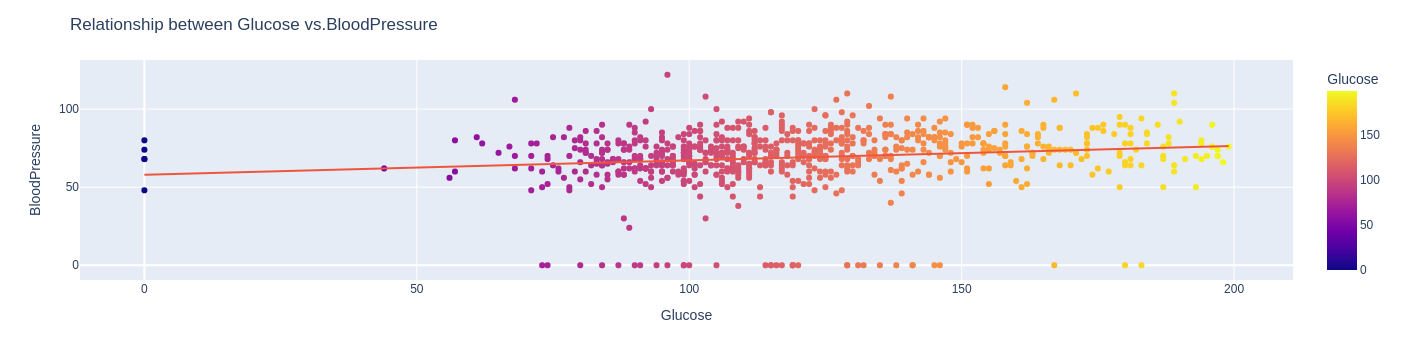

Type of Relation : Strong positve RelationShip


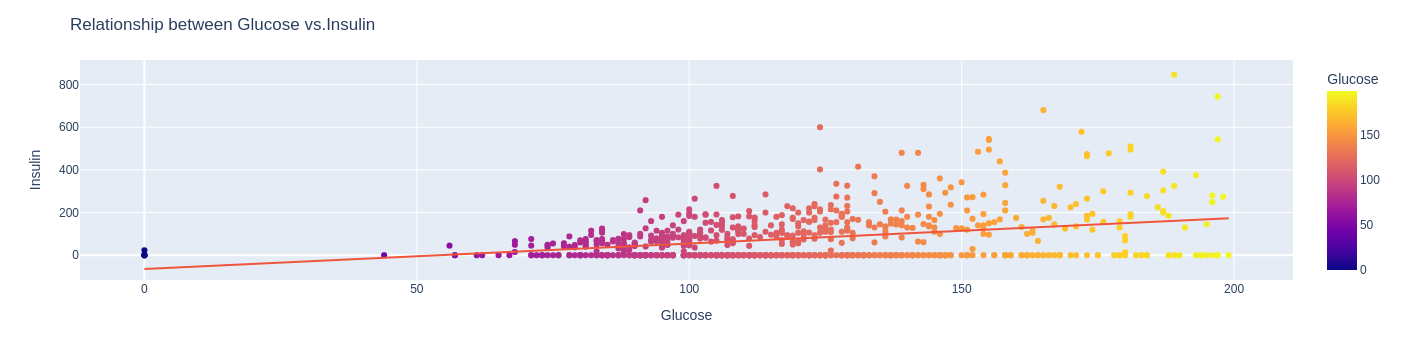

In [28]:
print("Type of Relation : Strong positve RelationShip")
#Create lineplot Observation Glucose vs.BloodPressure
fig = px.scatter(data, x='Glucose', y='BloodPressure', color='Glucose', color_discrete_sequence=color_palette,trendline='ols')
# Update the layout
fig.update_layout(title="Relationship between Glucose vs.BloodPressure ", xaxis_title="Glucose", yaxis_title="BloodPressure")
# Show the figure
fig.show()

print("Type of Relation : Strong positve RelationShip")
#Create lineplot Observation Glucose vs.Insulin
fig = px.scatter(data, x='Glucose', y='Insulin', color='Glucose', color_discrete_sequence=color_palette,trendline='ols')
# Update the layout
fig.update_layout(title="Relationship between Glucose vs.Insulin ", xaxis_title="Glucose", yaxis_title="Insulin")
# Show the figure
fig.show()





Type of Relation : week Negative RelationShip


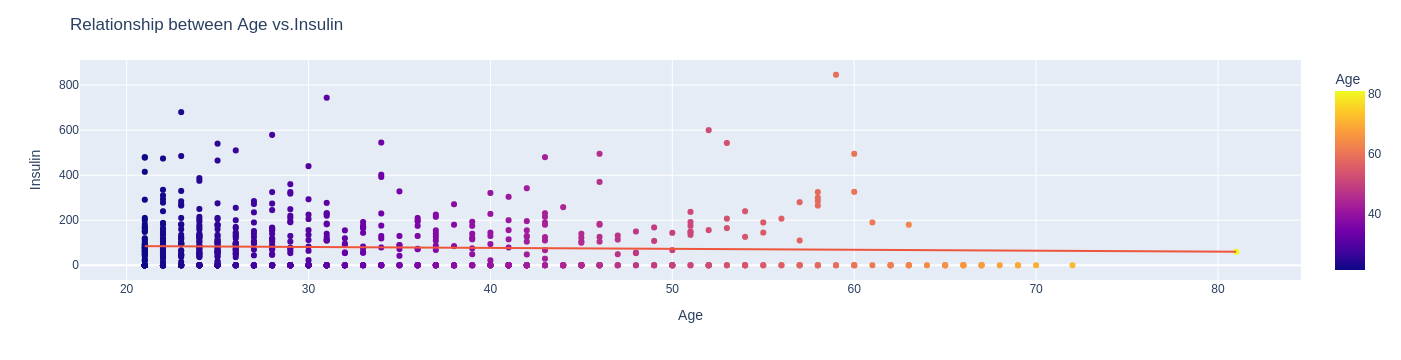

Type of Relation : Strong Positve RelationShip


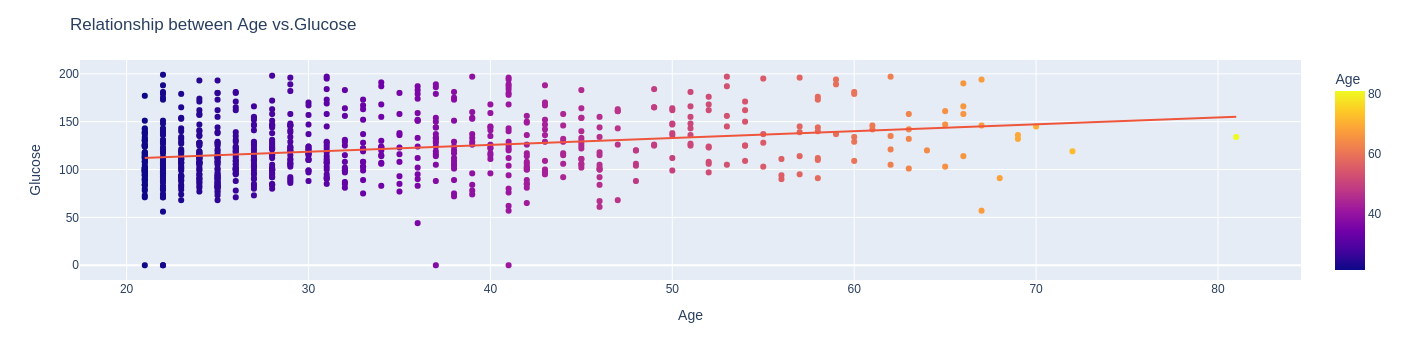

In [29]:
# Type of Relationship between Age .vs BloodPressure :

print("Type of Relation : week Negative RelationShip")
#Create lineplot Observation Age vs.Insulin
fig = px.scatter(data, x='Age', y='Insulin', color='Age', color_discrete_sequence=color_palette,trendline='ols')
# Update the layout
fig.update_layout(title="Relationship between Age vs.Insulin ", xaxis_title="Age", yaxis_title="Insulin")
# Show the figure
fig.show()

print("Type of Relation : Strong Positve RelationShip")
#Create lineplot Observation Glucose vs.Age
fig = px.scatter(data, x='Age', y='Glucose', color='Age', color_discrete_sequence=color_palette,trendline='ols')
# Update the layout
fig.update_layout(title="Relationship between Age vs.Glucose ", xaxis_title="Age", yaxis_title="Glucose")
# Show the figure
fig.show()


## Histogram Visualization :














<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

<p> &bull; i used Histogram on the Numerical Data Features </p> 

<p> &bull; We can see in this plots how data show  .</p> 

</div>

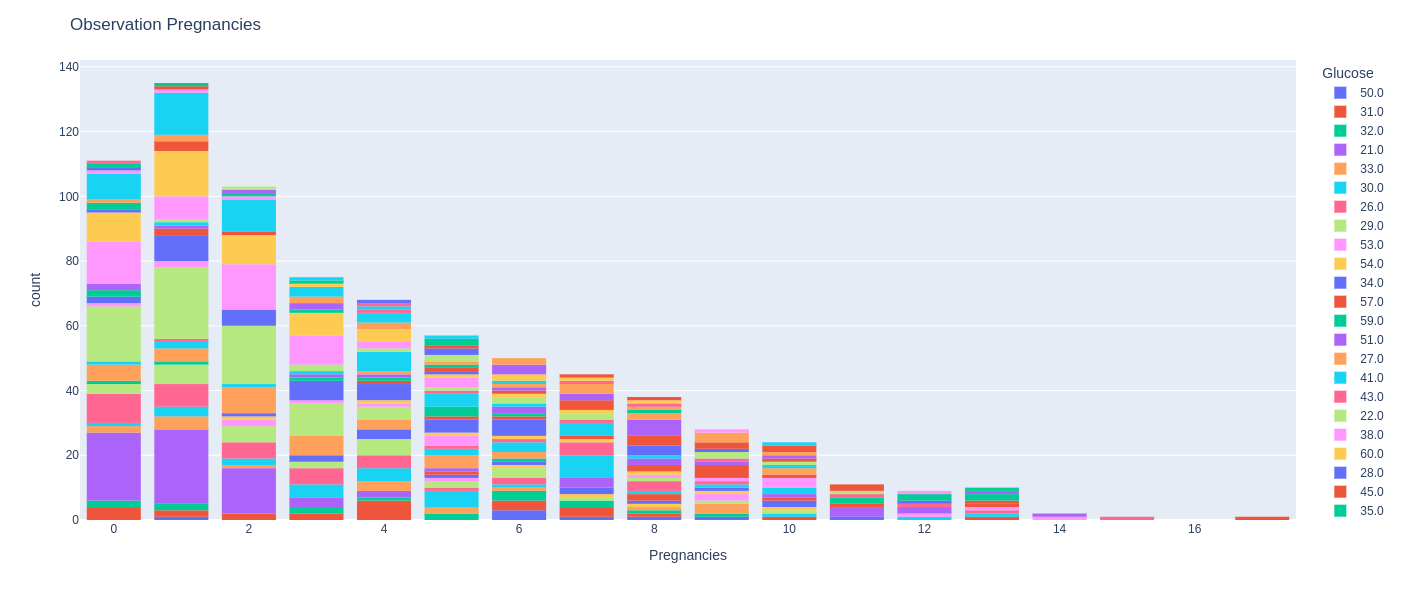

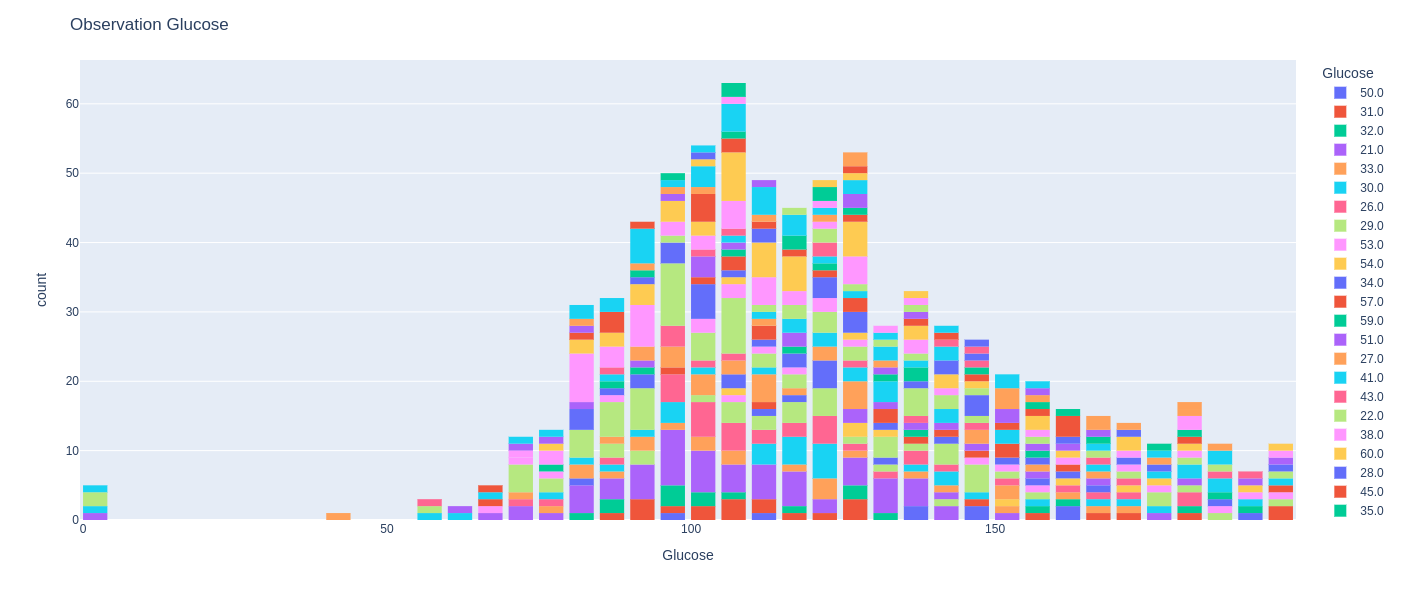

In [30]:
# Histogram that show how Pregnancies feature liked with Age :
fig = px.histogram(data, x="Pregnancies", color="Age")
fig.update_layout(
    bargap=0.2,
    title="Observation Pregnancies",
    legend_title="Glucose",
    width=800,  
    height=600  
)
fig.show()

# Here also you can see how Glucose feature liked with Age 
fig = px.histogram(data, x="Glucose", color="Age")
fig.update_layout(
    bargap=0.2,
    title="Observation Glucose",
    legend_title="Glucose",
    width=800,  
    height=600  
)
fig.show()

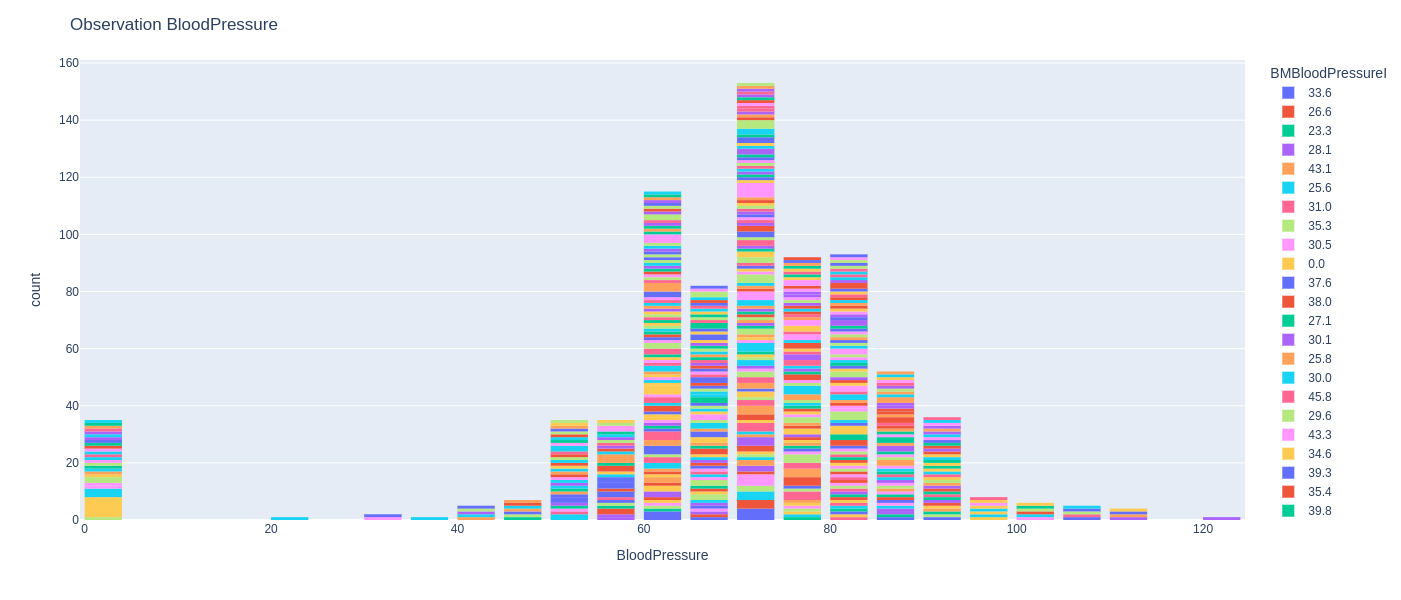

In [31]:
# Here also you can see how BloodPressure feature liked with BMI 
fig = px.histogram(data, x="BloodPressure", color="BMI")
fig.update_layout(
    bargap=0.2,
    title="Observation BloodPressure",
    legend_title="BMBloodPressureI",
    width=800,  
    height=600  
)
fig.show()

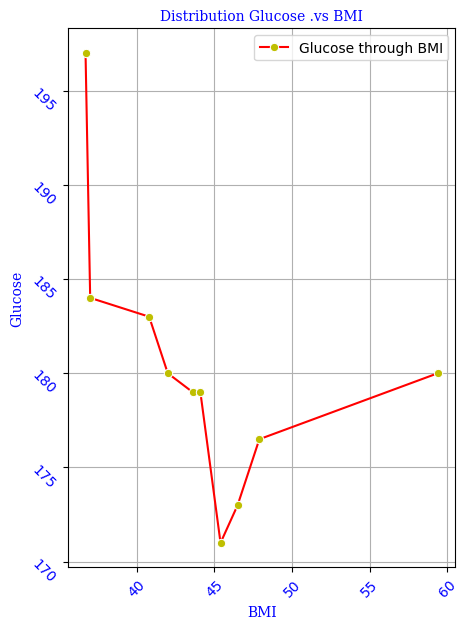

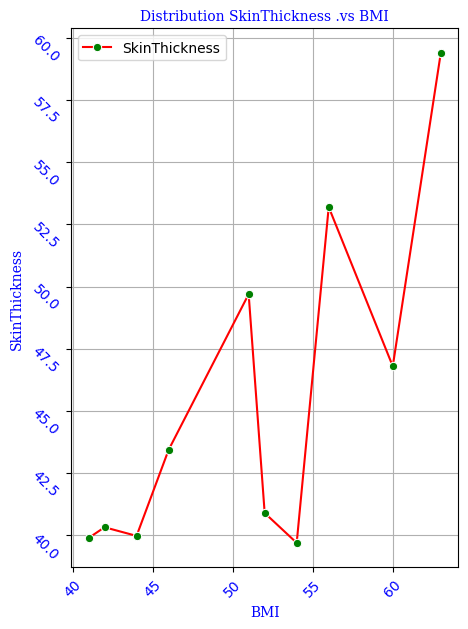

In [32]:
# observation  Glucose .vs BMI

f2={"family":"serif","size":10,"color":"b"}
plt.figure(figsize=(5,7))
plt.title("Distribution Glucose .vs BMI",fontdict=f2)

top1=data.groupby("BMI")["Glucose"].mean().sort_values(ascending=False).head(10)
sns.lineplot(x=top1.index,y=top1.values,color="r",marker="o",mfc="y",label="Glucose through BMI")

plt.xticks(rotation=45,color="b")
plt.xlabel("BMI",fontdict=f2)
plt.ylabel("Glucose",fontdict=f2)
plt.yticks(rotation=-45,color="b")
plt.grid(True)
plt.show()


# Distribution SkinThickness .vs BMI :


plt.figure(figsize=(5,7))
plt.title("Distribution SkinThickness .vs BMI",fontdict=f2)

top1=data.groupby("SkinThickness")["BMI"].mean().sort_values(ascending=False).head(10)
sns.lineplot(x=top1.index,y=top1.values,color="r",marker="o",mfc="g",label="SkinThickness")

plt.xticks(rotation=45,color="b")
plt.xlabel("BMI",fontdict=f2)
plt.ylabel("SkinThickness",fontdict=f2)
plt.yticks(rotation=-45,color="b")
plt.grid(True)
plt.show()


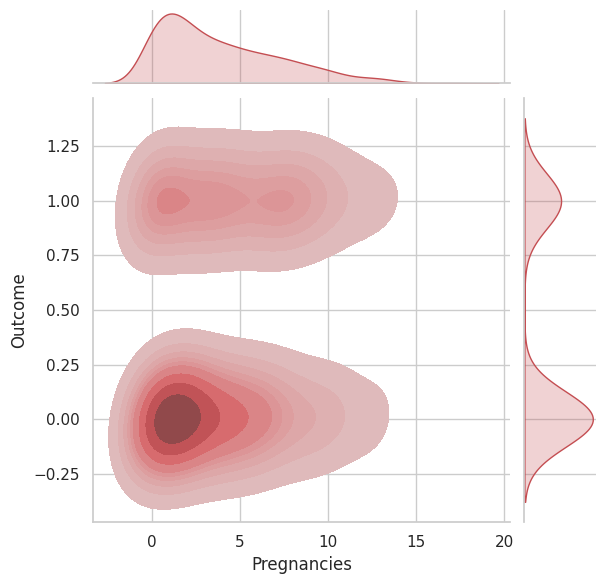

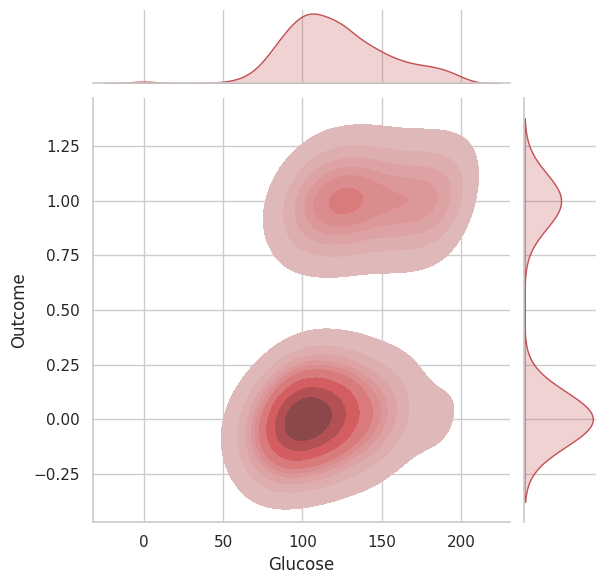

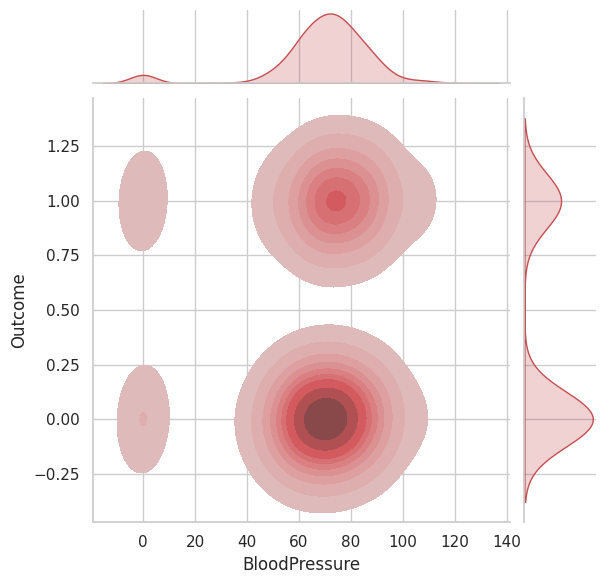

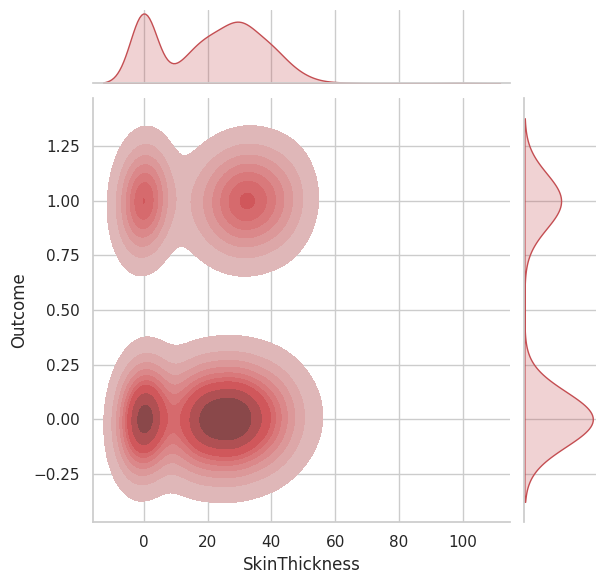

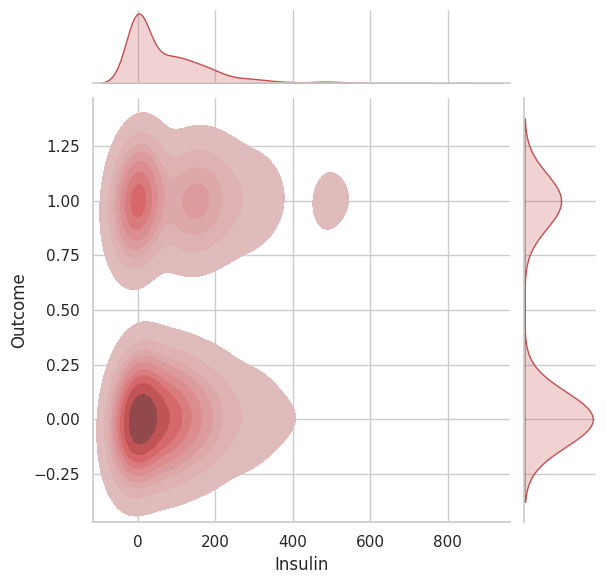

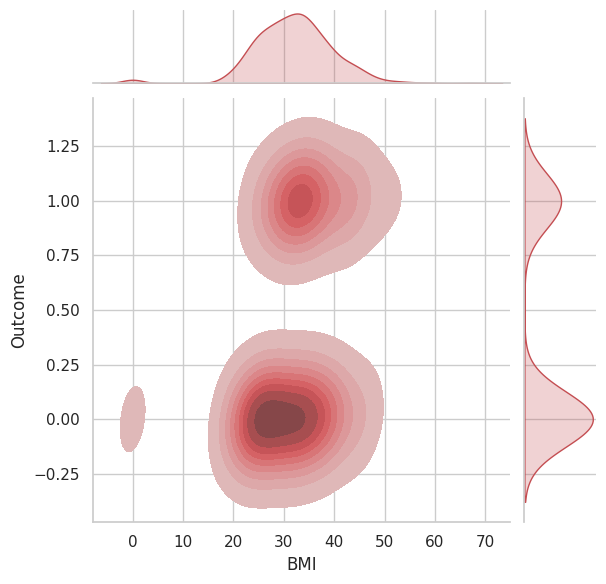

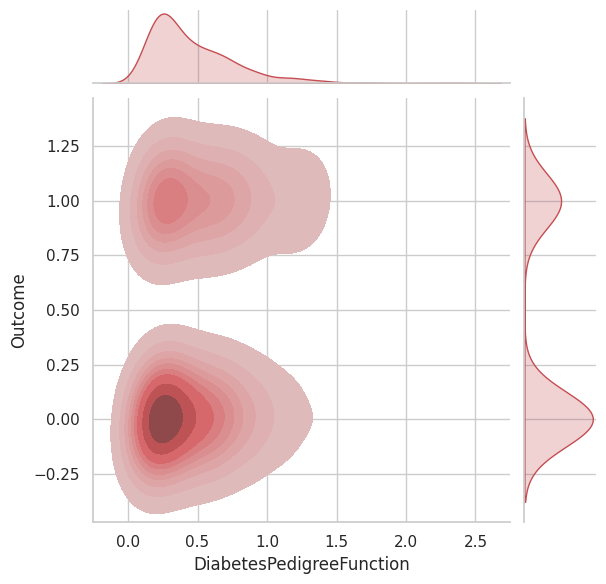

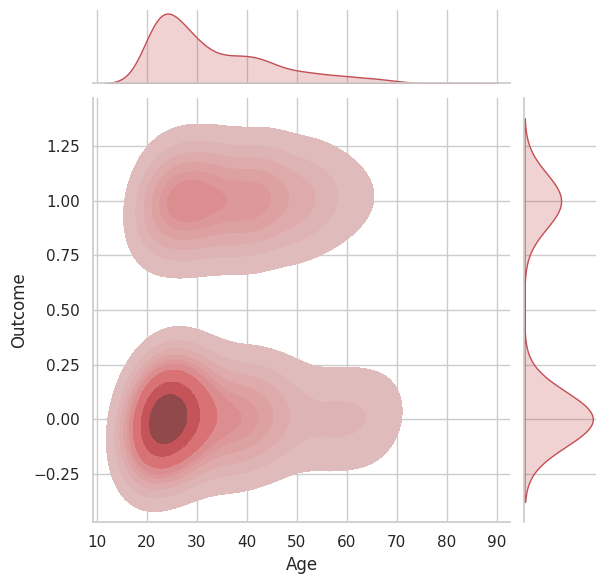

In [33]:
for col in data.select_dtypes("number"):
    if col !="Outcome":
       with sns.axes_style("white"):
           sns.set(style="whitegrid")  # Set the plot style
           sns.set_palette("coolwarm")    # Set the color palette
           sns.jointplot(x=data[col],y=data["Outcome"],kind="kde",fill=True,color="r")

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

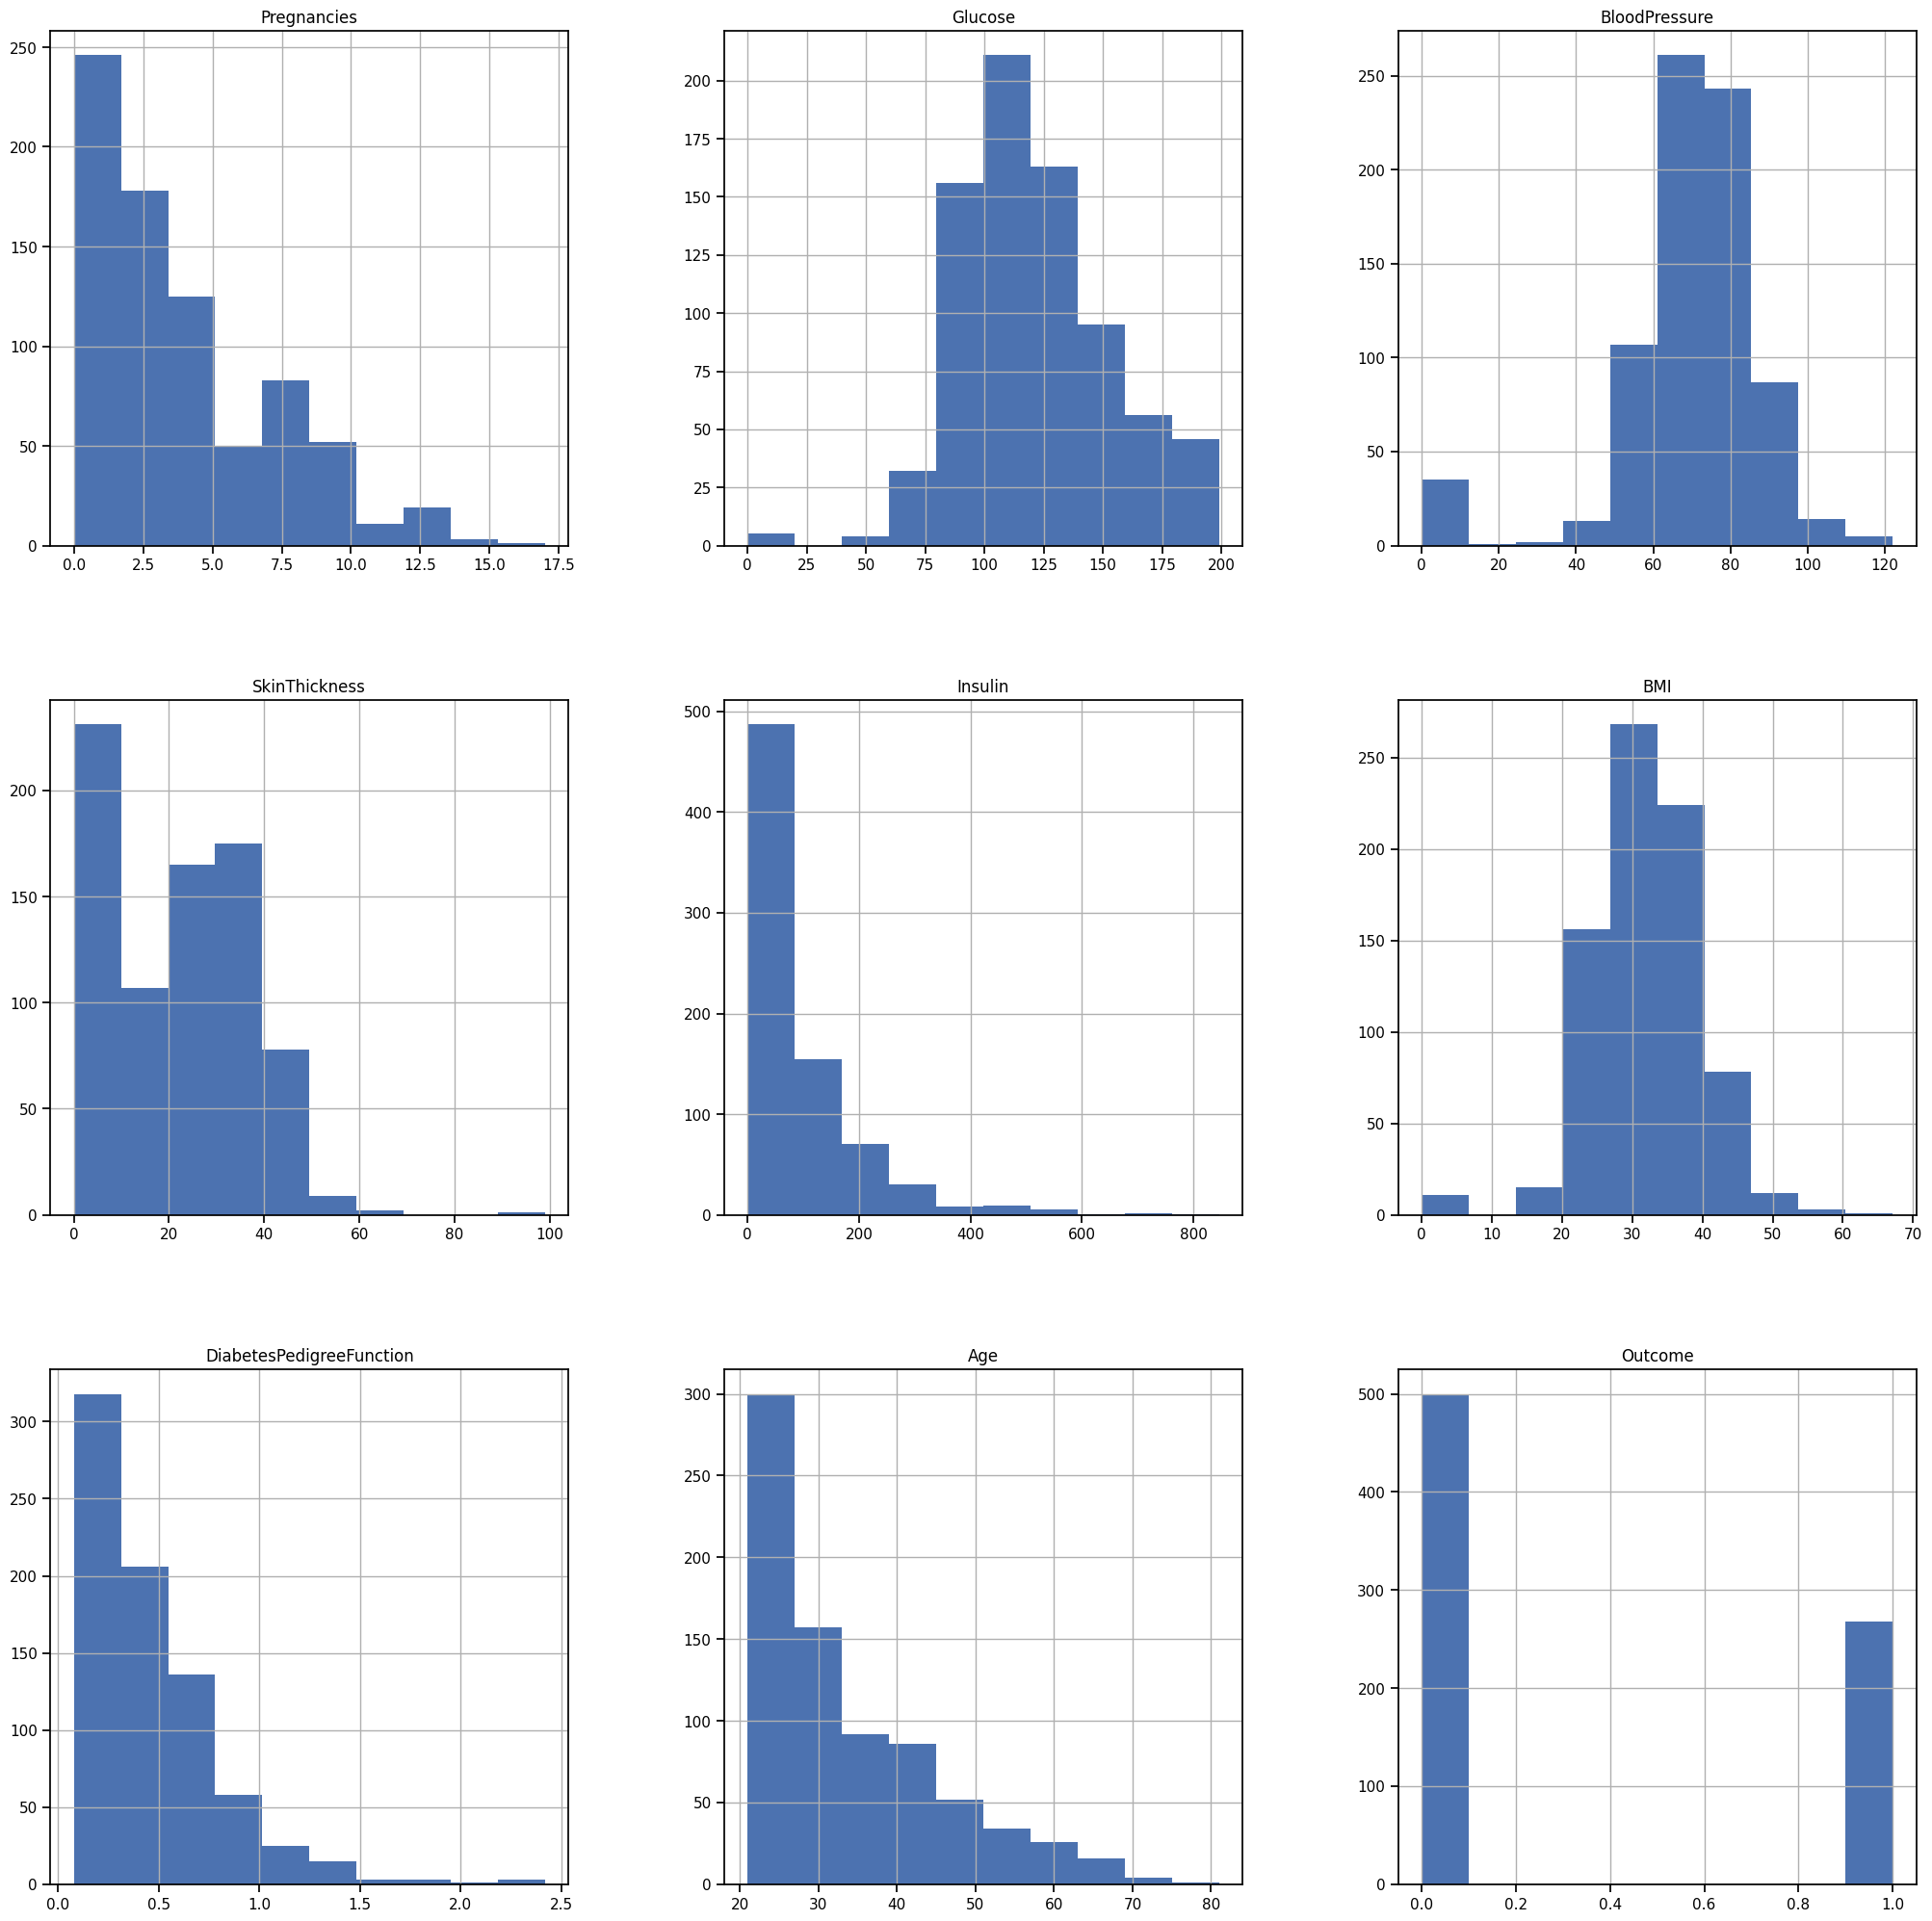

In [34]:
# plot the histgram:
data.hist(figsize=(25,25),color="b")

<Figure size 3600x3000 with 0 Axes>

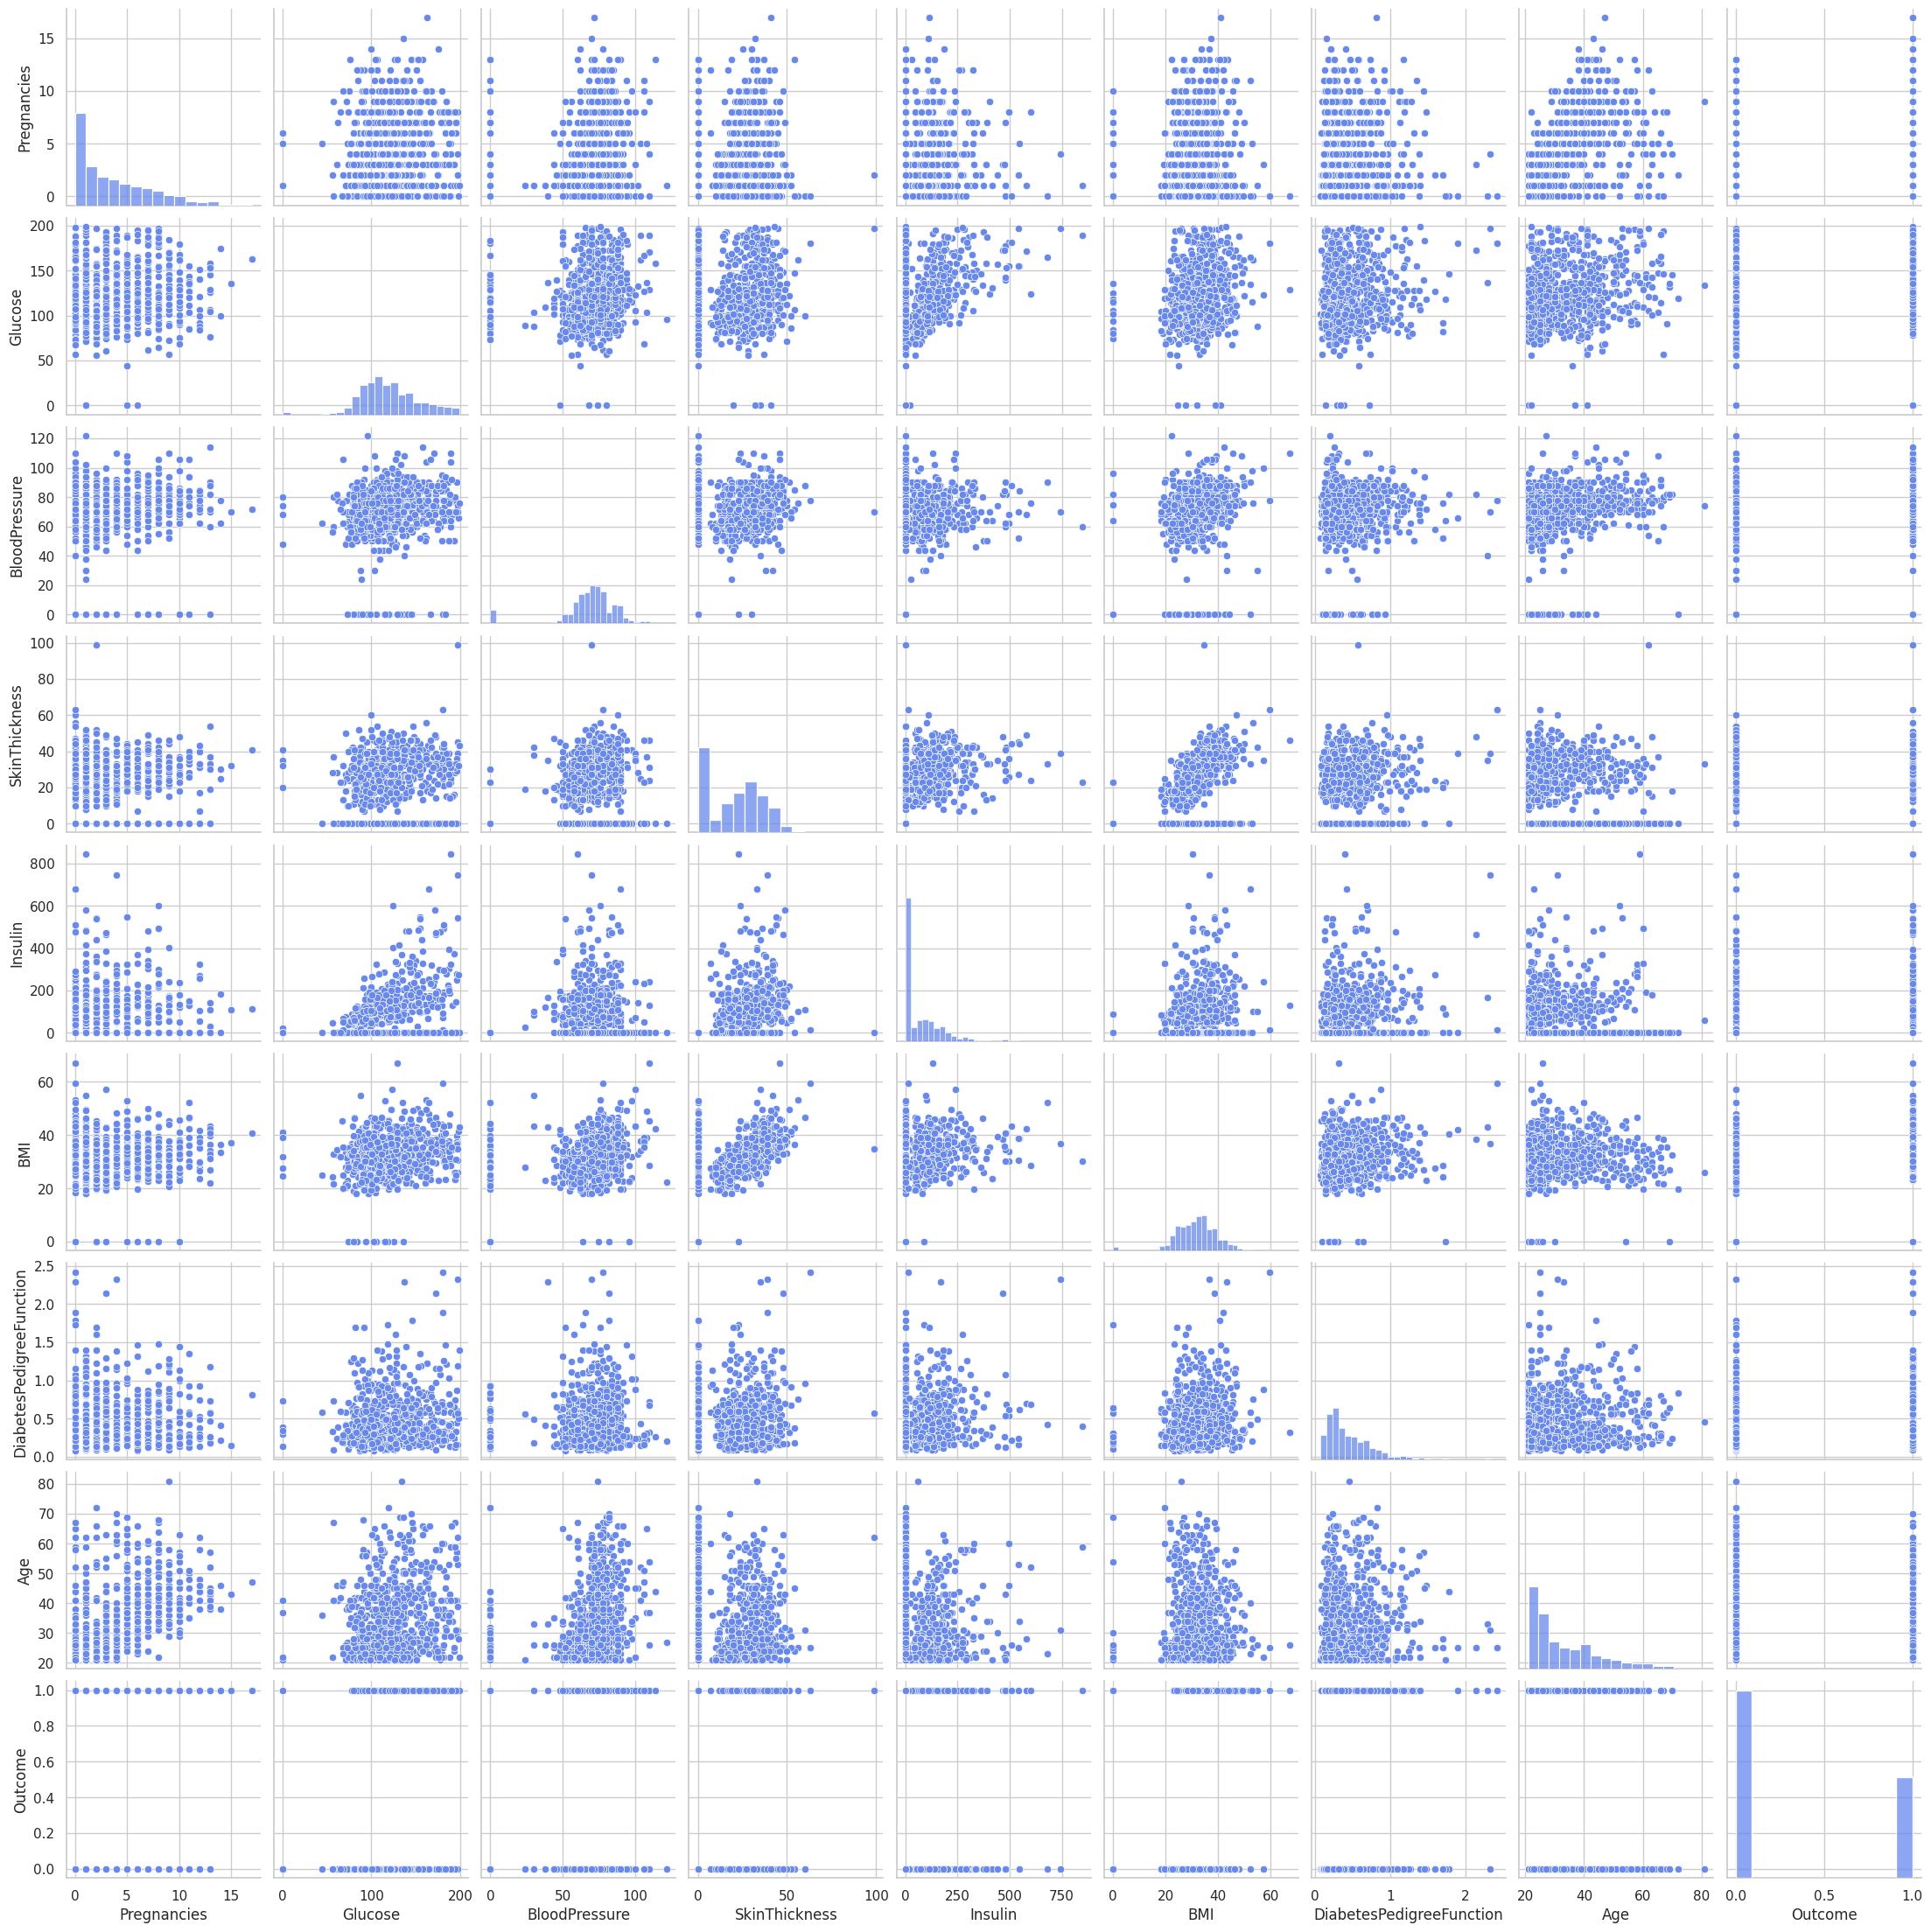

In [35]:
# observe for the float_data
plt.figure(figsize=(30, 25), dpi=120)
sns.set(style="whitegrid")  # Set the plot style
sns.set_palette("coolwarm")    # Set the color palette
sns.pairplot(data.select_dtypes("number"))

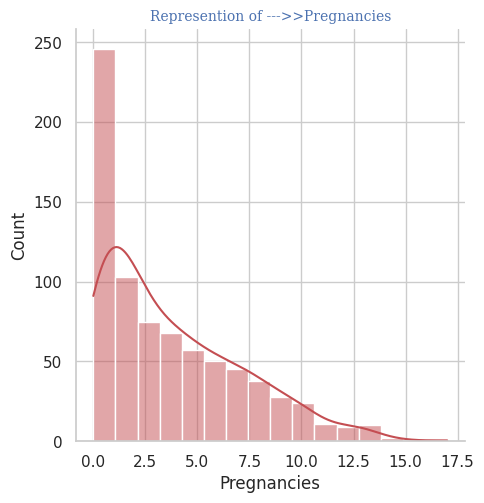

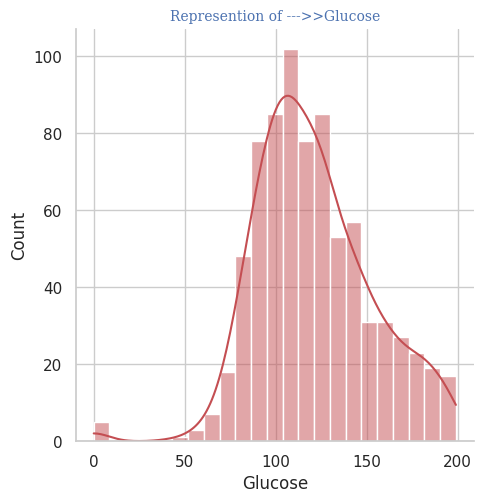

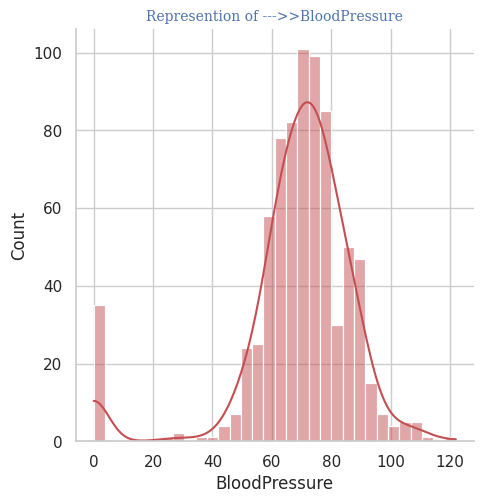

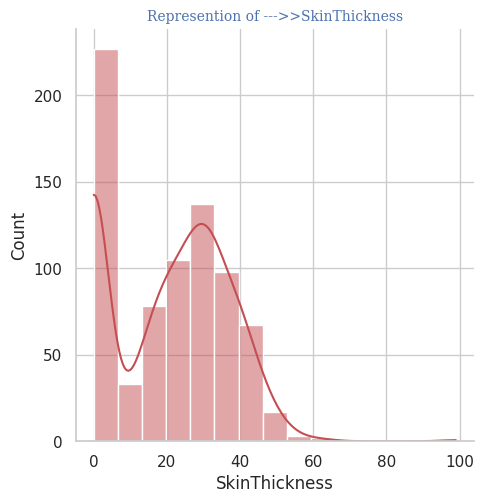

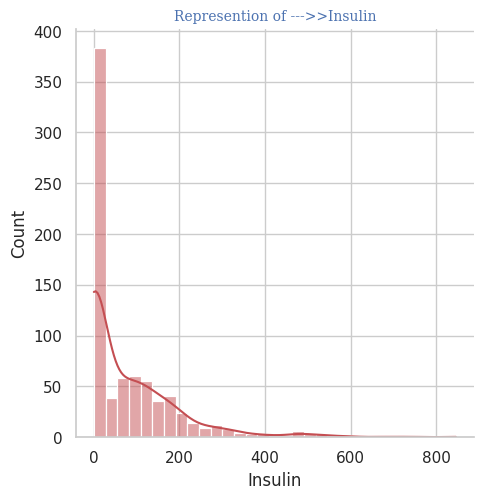

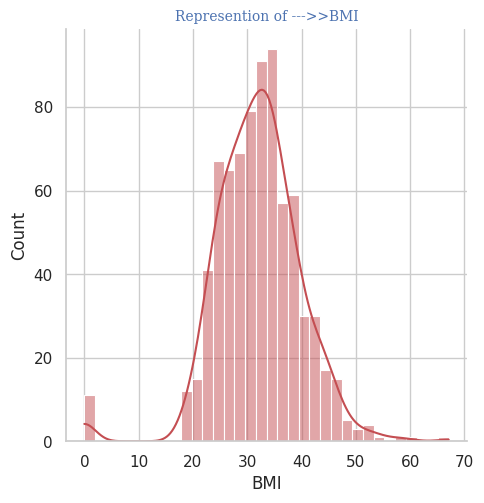

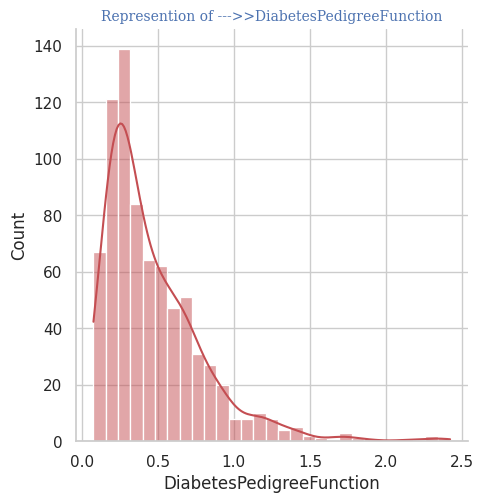

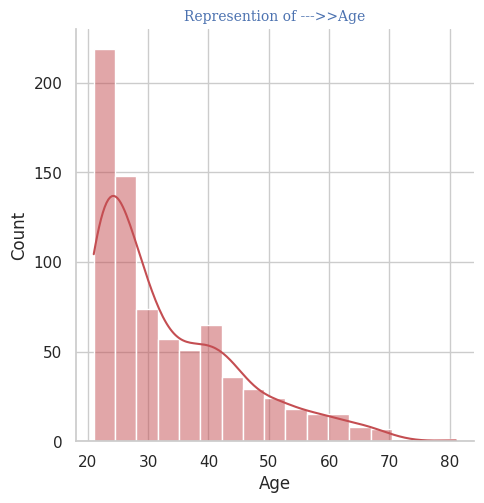

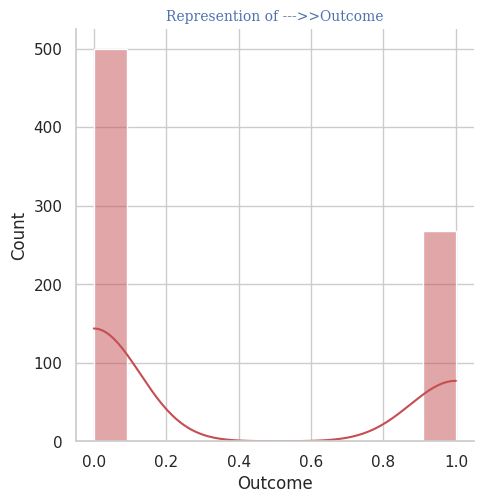

In [36]:
for col in data.select_dtypes(include="float64").columns:
    sns.displot(data[col],kde=True,color="r",label=col)
    sns.set(style="whitegrid")  # Set the plot style
    sns.set_palette("coolwarm")    # Set the color palette
    plt.title("Represention of --->>"+col,fontdict=f2)

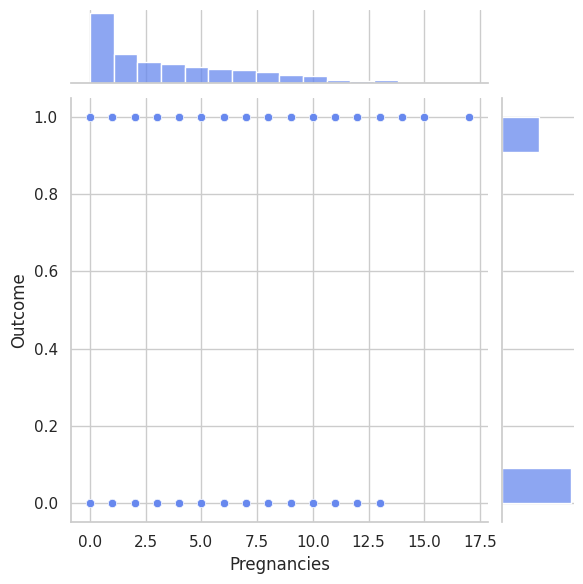

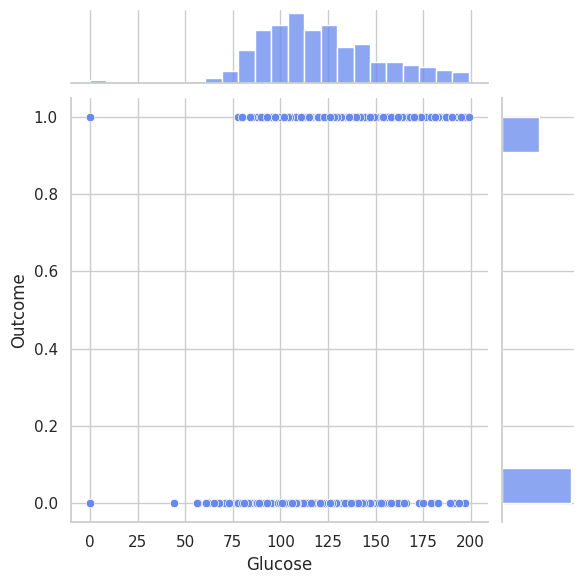

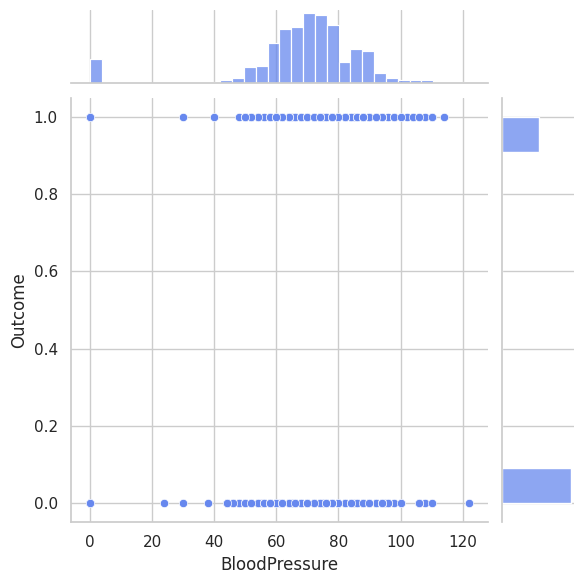

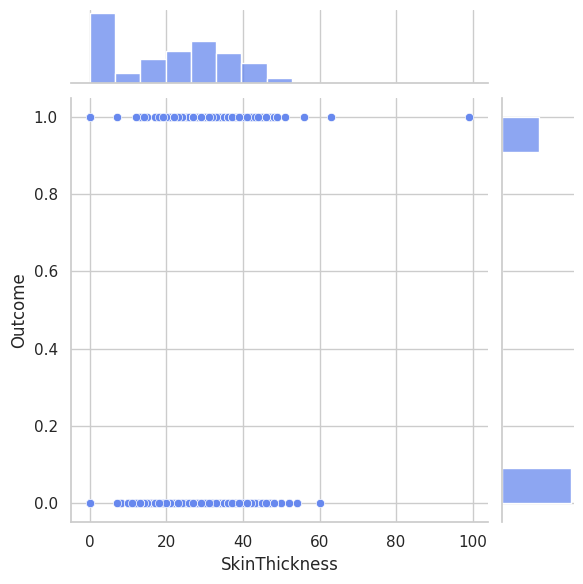

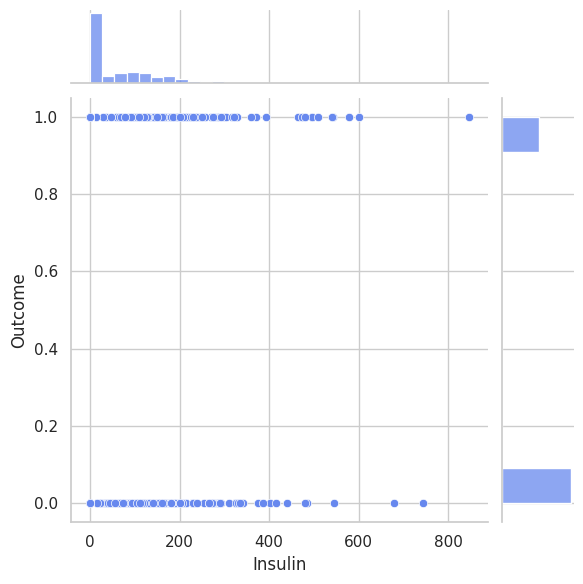

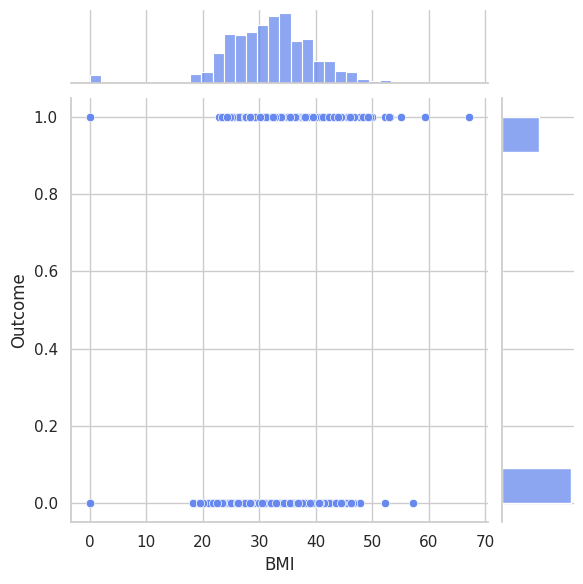

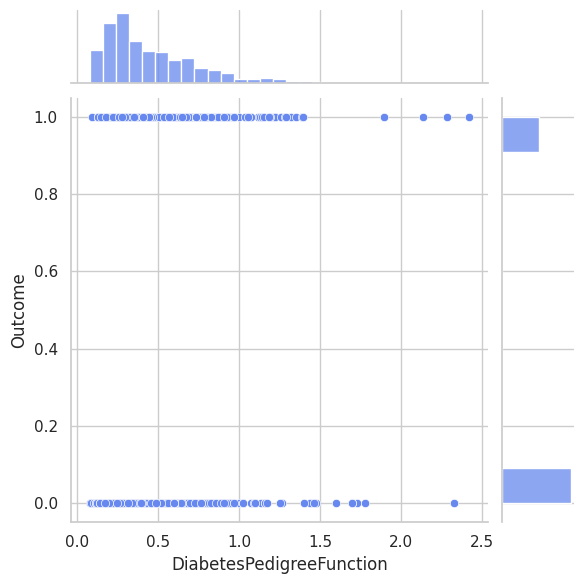

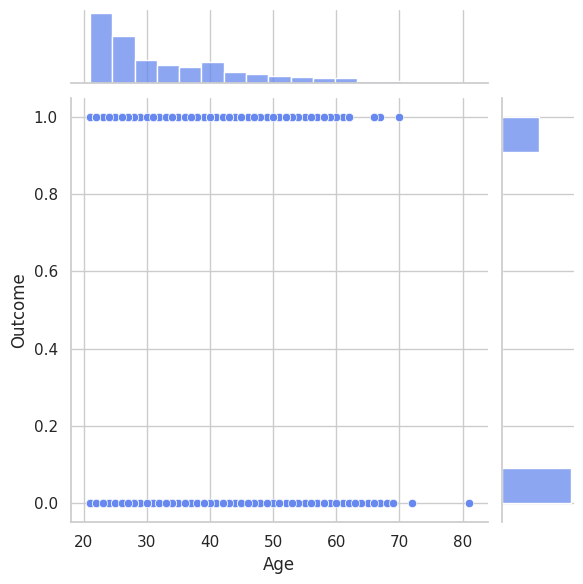

In [37]:
for col in data.select_dtypes("number"):
    if col !="Outcome":
       with sns.axes_style("white"):
          sns.set(style="whitegrid")  # Set the plot style
          sns.set_palette("coolwarm")    # Set the color palette
          sns.jointplot(x=data[col],y=data["Outcome"],kind="scatter")

## Data Processing :







<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

<p> &bull; i used dummies method from pandas pkg to convert any object/Categorical data into Numerical (Simple Note :There NO Any object Data)</p> 

<p> &bull; Also i used Standard Scaler on this Data</p> 

</div>



In [38]:
# Convert all Categorical columns into Numerical columns if found  :

obj_cols = data.select_dtypes("object").columns

for col in obj_cols:
    dummies = pd.get_dummies(data[col], prefix=col, drop_first=True)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)

data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            0.0      0.0  30.1   
767          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0      1.0  
1                       0.351  31.0      0.0  
2                       0.672  32.0      1.0  
3                       0.167  21.0      0.0  
4                       2.288  33.0      1.0  
..                        ...   ...      ...  
763                     0.171  63.0      0.0  
764                     0.340  27.0      0.0  
765                     0.245  30.0      0.0  
766                     0.349  47.0      1.0  
767                     0.315  23.0      0.0  

[768 rows x 9 columns]

In [39]:
numerical_features = data.select_dtypes(include=['number'])

scaler = StandardScaler()

scaled_numerical_features = scaler.fit_transform(numerical_features)

scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns)

scaled_numerical_df

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age   Outcome  
0                    0.468492  1.425995  1.365896  
1                   -0.365061 -0.190672 -0.732120  
2                    0.604397 -0.105584  1.365896  
3                   -0.920763 -1.041549 -0.732120  
4                    5.484909 -0.020496  1.365896  
..                        ...       ...       ...  
763                 -0.908682  2.532136 -0.732120  
764                 -0.398282 -0.531023 -0.732120  
765                 -0.685193 -0.275760 -0.732120  
766                 -0.371101  1.170732  1.365896  
767                 -0.473785 -0.871374 -0.732120  

[768 rows x 9 columns]

## Split Data for Classification :


<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

<p> &bull; i split data into x_class & y_class </p> 

<p> &bull; x_class : refer into all Data Except Target (Outcome)</p> 

<p> &bull; y_class : refer into Target (Outcome)</p> 

<p> &bull; then , iused train_test_split method to divide data into test , train</p> 
</div>




In [40]:
# split the data int train & test :

x_class,y_clss=make_classification(n_samples=100, n_features=9,random_state=42)

x_class=data.drop(columns="Outcome",axis=1)
y_class=data["Outcome"]

In [41]:
# train split of the Data
x_train,x_test,y_train,y_test=train_test_split(x_class,y_class,test_size=0.3,random_state=42)
print("x_train shape : ",x_train.shape)
print("x_test shape : ",x_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (537, 8)

x_test shape :  (231, 8)

y_train shape :  (537,)

y_test shape :  (231,)


## Bulding Five Traditional Machine Learning Modules :

<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

                             
<p> &bull; KNeighborsClassifier (KNN) </p> 

<p> &bull; RandomForestClassiﬁer </p> 

<p> &bull; Decision Tree Classiﬁer </p> 

<p> &bull; Logistic Regression </p> 

<p> &bull; Naive Bayes</p>
</div>




In [42]:
models={
    "LogisticRegression":LogisticRegression(random_state=42),
    "DecisionTreeClassifier":DecisionTreeClassifier(max_depth=5,random_state=42),
    "RandomForestClassifier":RandomForestClassifier(random_state=42),
    "knn_classifier" : KNeighborsClassifier(n_neighbors=2),
    "GaussianNB":GaussianNB()
          }

Model: LogisticRegression

Mean Squared Error (MSE): 0.2597402597402597

model_accuracy: 74.03%

LogisticRegression Evaluation Metrics:

LogisticRegression R^2 Score: 14.74%



Classification Report:

              precision    recall  f1-score   support



         0.0       0.80      0.80      0.80       151

         1.0       0.62      0.62      0.62        80



    accuracy                           0.74       231

   macro avg       0.71      0.71      0.71       231

weighted avg       0.74      0.74      0.74       231



--------------------------------------------------

Model: DecisionTreeClassifier

Mean Squared Error (MSE): 0.2510822510822511

model_accuracy: 74.89%

DecisionTreeClassifier Evaluation Metrics:

DecisionTreeClassifier R^2 Score: 10.91%



Classification Report:

              precision    recall  f1-score   support



         0.0       0.78      0.85      0.82       151

         1.0       0.67      0.55      0.60        80



    accuracy                 

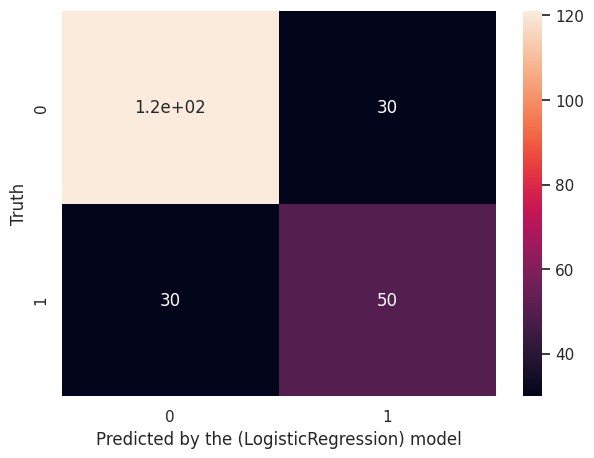

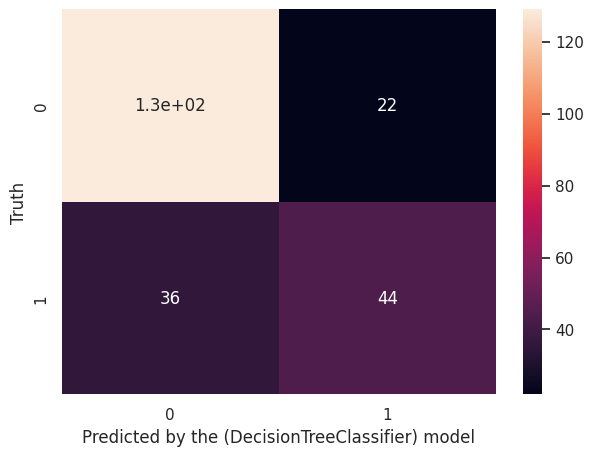

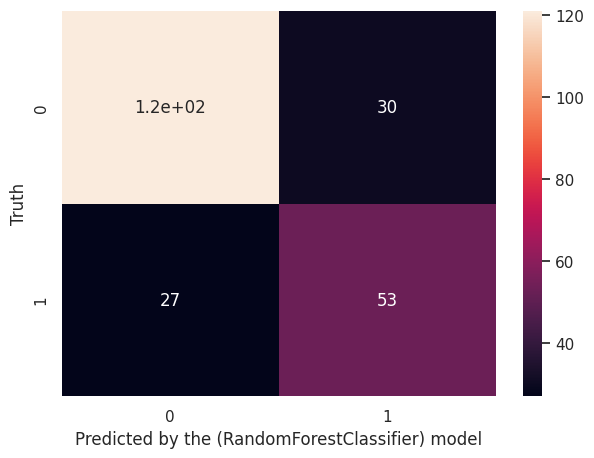

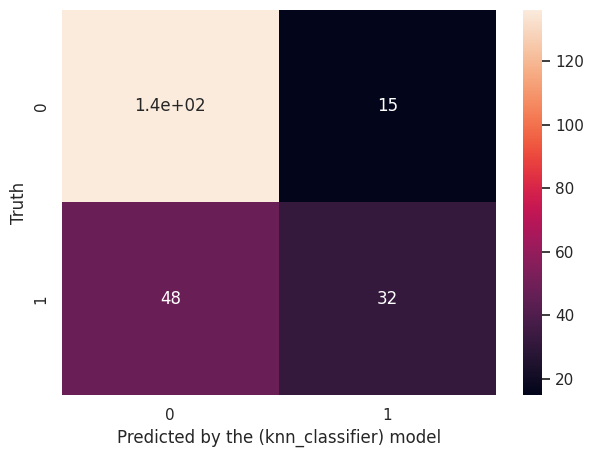

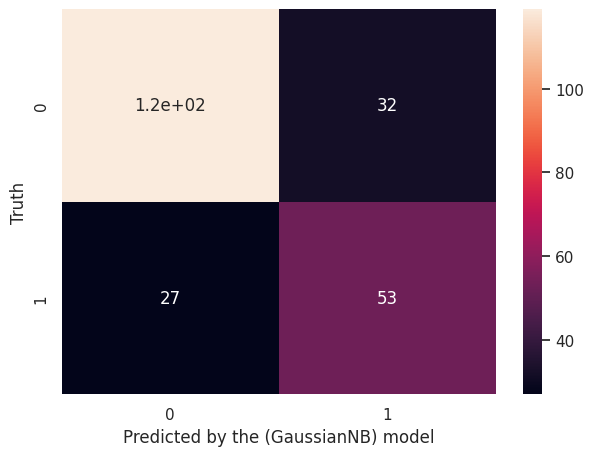

In [43]:
for model_name, model in models.items():
    # Fit the model to the training data
    
    model.fit(x_train, y_train)
    
    # Make predictions on the test data
    
    y_pred = model.predict(x_test)
    
    # Evaluate the model
    
    mse = metrics.mean_squared_error(y_test, y_pred)
    acc = model.score(x_test,y_test)

    model_evaluation_metrics = {}
    # Calculate confusion matrix and classification report
    
    cm = confusion_matrix(y_test, y_pred)
    classif_report = classification_report(y_test, y_pred)

    # Calculate R^2 score
    
    r2 = metrics.r2_score(y_test, y_pred)
    
    # Store the evaluation metric
    model_evaluation_metrics[model_name] = r2
    
    # Storing the results
    
    model_evaluation_metrics[model_name] = {
        "Confusion Matrix":cm,
        'Classification Report': classif_report
            }
    
    plt.figure(figsize=(7,5))
    sns.heatmap(cm,annot=True)
    plt.xlabel(f"Predicted by the ({model_name}) model")
    plt.ylabel('Truth'),
    
    # Print the evaluation metrics for each model
    
    print(f"Model: {model_name}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"model_accuracy: {acc*100:0.2f}%")
    print(f"{model_name} Evaluation Metrics:")
    print(f"{model_name} R^2 Score: {(abs(r2) * 100):.2f}%")
    print("\nClassification Report:")
    print(classif_report)
    print("-"*50)
    
    


In [44]:
# Explain the prediction for DecisionTree_model :
DT=models["DecisionTreeClassifier"]
tree_representation = tree.export_text(DT)
print(tree_representation)

|--- feature_1 <= 154.50

|   |--- feature_7 <= 28.50

|   |   |--- feature_1 <= 127.50

|   |   |   |--- feature_5 <= 49.10

|   |   |   |   |--- feature_5 <= 31.40

|   |   |   |   |   |--- class: 0.0

|   |   |   |   |--- feature_5 >  31.40

|   |   |   |   |   |--- class: 0.0

|   |   |   |--- feature_5 >  49.10

|   |   |   |   |--- class: 1.0

|   |   |--- feature_1 >  127.50

|   |   |   |--- feature_2 <= 56.00

|   |   |   |   |--- class: 1.0

|   |   |   |--- feature_2 >  56.00

|   |   |   |   |--- feature_5 <= 30.30

|   |   |   |   |   |--- class: 0.0

|   |   |   |   |--- feature_5 >  30.30

|   |   |   |   |   |--- class: 0.0

|   |--- feature_7 >  28.50

|   |   |--- feature_5 <= 26.95

|   |   |   |--- feature_7 <= 29.50

|   |   |   |   |--- class: 1.0

|   |   |   |--- feature_7 >  29.50

|   |   |   |   |--- feature_5 <= 9.65

|   |   |   |   |   |--- class: 0.0

|   |   |   |   |--- feature_5 >  9.65

|   |   |   |   |   |--- class: 0.0

|   |   |--- feature_5 >  26

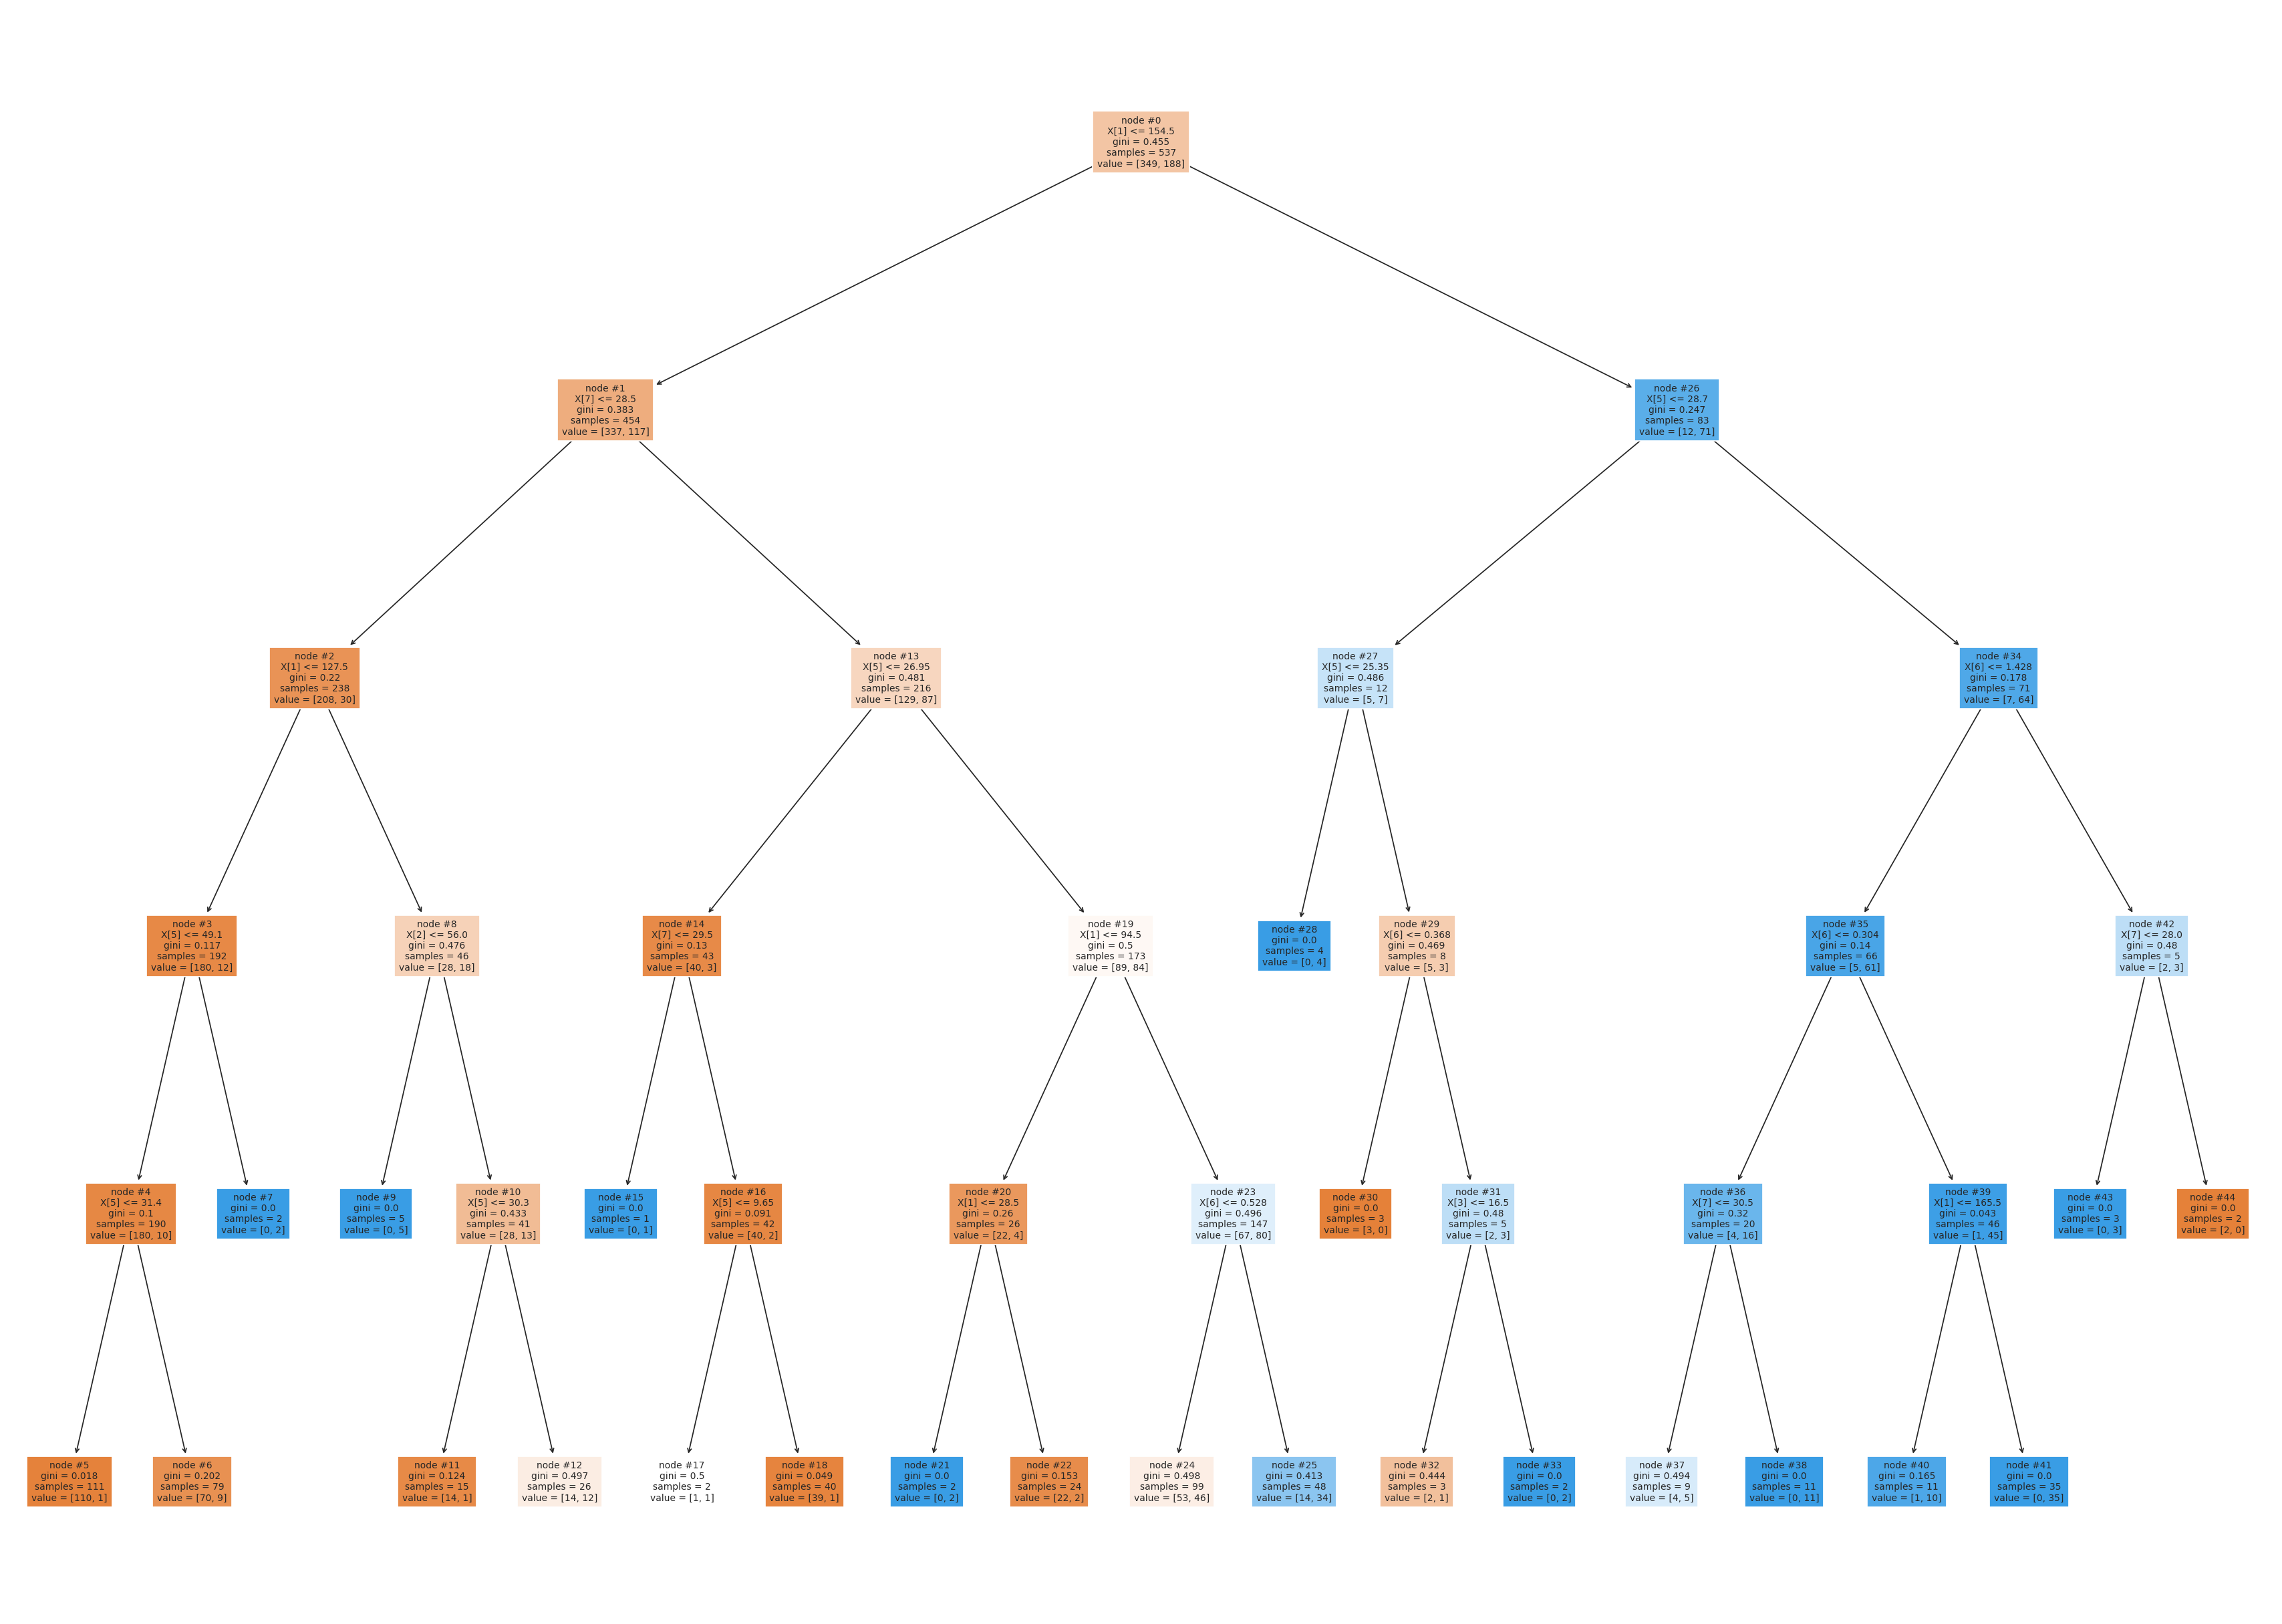

In [45]:
# Create the decision tree model
decision_tree_model = models["DecisionTreeClassifier"]

# Plot the tree
plt.figure(figsize=(35, 25), dpi=125)  # Adjust figure size as needed
tree.plot_tree(decision_tree_model, filled=True, node_ids=True, fontsize=8)
plt.show()

## Bulding Artifical Neural Network (ANN MODEL): 


<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

                             
<p> &bull; at first ,Input Layer: The input shape is [8], 8 -> Refer into Number of Dataset Featurese Except TARGET </p> 

<p> &bull; Hidden Layers: </p> 

<p> &bull; Layer 1: Dense(64, activation="relu") with L2 regularization and Dropout(0.3).</p> 

<p> &bull; Layer 2: Dense(128, activation="relu") with L2 regularization and Dropout(0.4 </p> 

<p> &bull; Layer 3: Dense(256, activation="relu") with L2 regularization and Dropout(0.5). </p> 

<p> &bull; Layer 4: Dense(128, activation="relu") with L2 regularization and Dropout(0.4). </p> 

<p> &bull; Layer 5: Dense(64, activation="relu") with L2 regularization and Dropout(0.3 </p> 

<p> &bull; Output Layer: Dense(1, activation="sigmoid") with L2 regularization </p> 

<p> &bull; Summary : </p>

<p> &bull;Simplified Architecture: Reduced the number of units in the dense layers to avoid overfitting.</p>

<p>&bull;Batch Normalization: Retained to stabilize the learning process.</p>

<p>&bull;Dropout: Adjusted dropout rates to balance regularization and information preservation.</p>

<p>&bull;L2 Regularization: Retained to prevent overfitting</p>

<p> &bull; Model Training:  </p>

<p> &bull; i train the model on 2000 epochs & used Callbacks to stop the model training at 87 % accuracy   </p>

<p> &bull; Also rained the model with 100 batch_size ,validation_split= 0.1  </p>

<p> &bull; Model Compile:  </p>

<p> &bull; i used Adam optimizer with learning_rate=0.001 </p>

<p> &bull; Also , used Binarycrossentroy with loss  </p>

</div>




In [46]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout,BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import Callback

2024-09-04 18:29:02.712462: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

2024-09-04 18:29:02.733688: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.

2024-09-04 18:29:02.876374: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.

2024-09-04 18:29:02.877227: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.

To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.

2024-09-04 18:29:03.844842: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [47]:
# Define a Callback class that stops training once accuracy reaches 87%

class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.87):
      print("\nReached % 87accuracy so cancelling training!")
      self.model.stop_training = True

In [48]:
# Bulding & training the model :

# Define the model
model_r = Sequential([
    Input(shape=[8]),
    
    Dense(units=64, activation="relu", kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(units=128, activation="relu", kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(units=256, activation="relu", kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(units=128, activation="relu", kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(units=64, activation="relu", kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(units=1, activation="sigmoid", kernel_regularizer=l2(0.01)),
])

# Print the model summary
model_r.summary()

# compile the model :

callbacks=myCallback()
#compile:
model_r.compile(
    loss=BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
  )




history=model_r.fit(x_train,y_train,epochs=2000,batch_size=100,validation_split=0.1,callbacks=[callbacks])
history




Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 dense (Dense)               (None, 64)                576       

                                                                 

 batch_normalization (Batch  (None, 64)                256       

 Normalization)                                                  

                                                                 

 dropout (Dropout)           (None, 64)                0         

                                                                 

 dense_1 (Dense)             (None, 128)               8320      

                                                                 

 batch_normalization_1 (Bat  (None, 128)               512       

 chNormalization)                                                

                                                                 

 dropout_1 (Dropout)         (None, 128)

2024-09-04 18:29:04.826630: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355

2024-09-04 18:29:04.827266: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.

Skipping registering GPU devices...


Epoch 1/2000

5/5 [==============================] - 2s 55ms/step - loss: 6.0823 - accuracy: 0.5342 - val_loss: 6.1729 - val_accuracy: 0.4074

Epoch 2/2000

5/5 [==============================] - 0s 10ms/step - loss: 5.8723 - accuracy: 0.5921 - val_loss: 6.3508 - val_accuracy: 0.4074

Epoch 3/2000

5/5 [==============================] - 0s 10ms/step - loss: 5.6939 - accuracy: 0.6418 - val_loss: 6.2711 - val_accuracy: 0.4074

Epoch 4/2000

5/5 [==============================] - 0s 10ms/step - loss: 5.5758 - accuracy: 0.6501 - val_loss: 6.1479 - val_accuracy: 0.4074

Epoch 5/2000

5/5 [==============================] - 0s 11ms/step - loss: 5.3873 - accuracy: 0.6936 - val_loss: 5.9751 - val_accuracy: 0.4074

Epoch 6/2000

5/5 [==============================] - 0s 11ms/step - loss: 5.2824 - accuracy: 0.6853 - val_loss: 5.7603 - val_accuracy: 0.4074

Epoch 7/2000

5/5 [==============================] - 0s 10ms/step - loss: 5.1835 - accuracy: 0.6812 - val_loss: 5.5802 - val_accuracy: 0.4074


In [49]:
# predict on the model:
y_p=model_r.predict(x_test)
y_p[:10]

8/8 [==============================] - 0s 2ms/step


array([[0.02687448],
       [0.23219879],
       [0.20358962],
       [0.08228458],
       [0.30231652],
       [0.07480475],
       [0.00302168],
       [0.19100055],
       [0.46663964],
       [0.4631667 ]], dtype=float32)

In [50]:
# compute min & max in the y_prediction:
print(f"the min_value for prediction --->> {np.min(y_p)} \n the max_value for prediction --->>> {np.max(y_p)} ")

the min_value for prediction --->> 0.0022368812933564186 

 the max_value for prediction --->>> 0.9995402693748474 


In [51]:
#Evalute the ANN_model:
model_r.evaluate(x_test,y_test,verbose=2)

8/8 - 0s - loss: 0.7862 - accuracy: 0.7359 - 26ms/epoch - 3ms/step


[0.7862100601196289, 0.7359307408332825]

## Save & Load the Model :

In [52]:
# Save the model
model_r.save('ANN_model.h5')

# Load the trained model
model_r = tf.keras.models.load_model('ANN_model.h5')

## Visualization of Artifcal Neural Network Model :

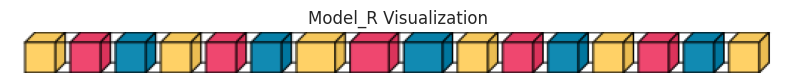

In [53]:
import visualkeras
from PIL import Image

# Save the visualization as an image file
visualization_path = 'model_visualization.png'
visualkeras.layered_view(model_r).save(visualization_path)

# Display the image using matplotlib
img = Image.open(visualization_path)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.title("Model_R Visualization")
plt.axis('off')
plt.show()

## Results Train :

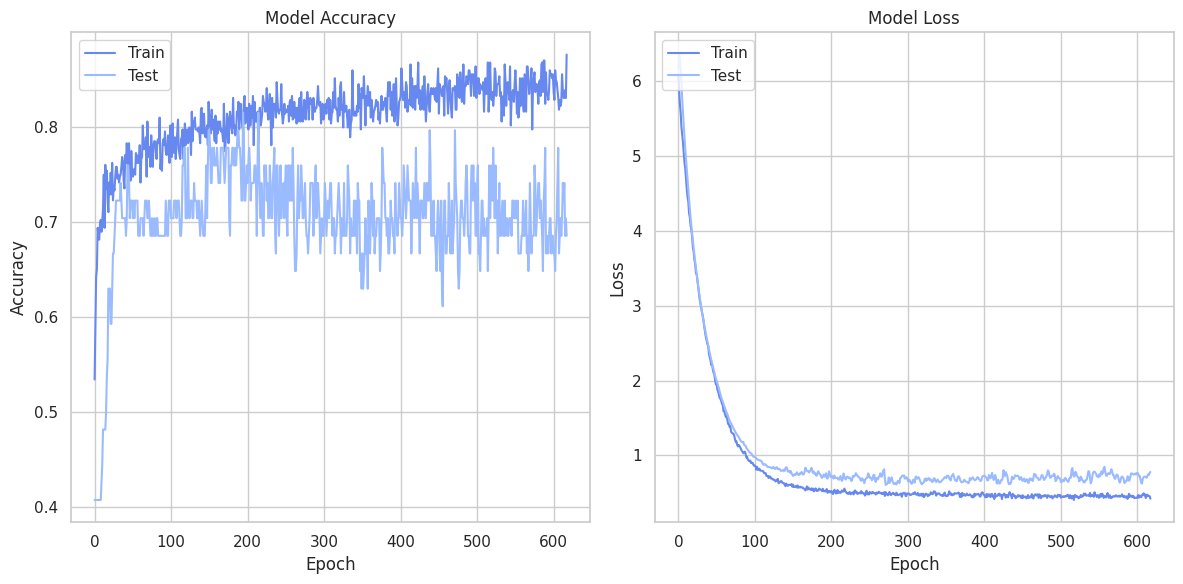

In [54]:
# Plotting training history (accuracy and loss)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

## Results :

<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

                             
<p> &bull; Model : LogisticRegression  </p> 
<p> &bull; Mean Squared Error (MSE): 0.2597402597402597  </p> 
<p> &bull; model_accuracy: 74.03%  </p> 
<p> &bull; R^2 :14.74%  </p>
<p> --------------------------------------------------------------------------------------  </p> 

<p> &bull; Model : DecisionTreeClassifier  </p> 
<p> &bull; Mean Squared Error (MSE): 0.2510822510822511 </p> 
<p> &bull; model_accuracy:  74.89% </p> 
<p> &bull; R^2 : 10.91% </p>
<p> --------------------------------------------------------------------------------------  </p> 

<p> &bull; Model : RandomForestClassifier  </p> 
<p> &bull; Mean Squared Error (MSE):  0.24675324675324675 </p> 
<p> &bull; model_accuracy: 75.32%  </p> 
<p> &bull; R^2 : 9.00% </p>
<p> --------------------------------------------------------------------------------------  </p> 


<p> &bull; Model : knn_classifier   </p> 
<p> &bull; Mean Squared Error (MSE): 0.24675324675324675  </p> 
<p> &bull; model_accuracy:67.53%  </p> 
<p> &bull; R^2 : 20.47% </p>
<p> --------------------------------------------------------------------------------------  </p> 


<p> &bull; Model : GaussianNB </p> 
<p> &bull; Mean Squared Error (MSE): 0.255411255411255  </p> 
<p> &bull; model_accuracy: 74.46% </p> 
<p> &bull; R^2 : 12.82% </p>
<p> --------------------------------------------------------------------------------------  </p> 


<p> &bull; Model :Artifcal Neural Network (ANN)   </p> 
<p> &bull; loss: 0.4282   </p> 
<p> &bull; model_accuracy: 87 %   </p> 
<p> --------------------------------------------------------------------------------------  </p> 


</div>

## See the best model :

<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

                             
<p> &bull; At first we known that Every model has Advantages & disadvantages , so we cant say that there model is the best at all .  </p> 
<p> &bull; but , in this Dataset , we will detect the best model based on : </p> 
<p> &bull; highest R^2 : CoffientDetermination   </p> 
<p> &bull;MSE : lowest mean square Error  </p>
<p> &bull; Comparing  Metrics   </p>
<p> &bull; After Comparing All of these condation the Best model in Traditional Ml-models : LogisticRegression </p>

<p> &bull; And in the Artifical Neural Network we can say is the best & more powerful model </p>

</div>


## Split Data for Regression  :


<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

<p> &bull; i split data into x_reg & y_reg </p> 

<p> &bull; x_reg : refer into all Data Except Target (DiabetesPedigreeFunction)</p> 

<p> &bull; y_reg : refer into Target (DiabetesPedigreeFunction)</p> 

<p> &bull; then , iused train_test_split method to divide data into test , train sets </p> 
</div>




In [55]:
# split the data int train & test :
x_reg, y_reg = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
x_reg=data.drop(columns="DiabetesPedigreeFunction",axis=1)
y_reg=data["DiabetesPedigreeFunction"]

In [56]:
# train split of the Data
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_reg,y_reg,test_size=0.3,random_state=42)
print("x_train shape : ",x_train_1.shape)
print("x_test shape : ",x_test_1.shape)
print("y_train shape : ",y_train_1.shape)
print("y_test shape : ",y_test_1.shape)

x_train shape :  (537, 8)

x_test shape :  (231, 8)

y_train shape :  (537,)

y_test shape :  (231,)


## Bulding Regression models :

<div style="border: 2px solid yellow; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

<p> &bull; KNeighborsRegressors (KNN)  </p> 

<p> &bull; RandomForestRegressor  </p> 

<p> &bull; DecisionTreeRegressor  </p> 

<p> &bull; linearRegression  </p> 

<p> &bull; SVR(supportvectorRegressor).  </p> 

<p> &bull; SVR(supportvectorRegressor).  </p> 

<p> &bull; Ridge model with GridSearchCV model  </p> 

</div>






In [57]:
parameters=[{'alpha':[0.001,0.1,1,10,100,1000,100000,10000000,1000000]}]
RR=Ridge()

models={
    "linearRegression":LinearRegression(),
    "DecisionTreeRegressor":DecisionTreeRegressor(max_depth=5,random_state=42),
    "RandomForestRegressor":RandomForestRegressor(random_state=42),
    "knn_Regressor" :KNeighborsRegressor(n_neighbors=2),
    "SVR":SVR(),
    "Grid":GridSearchCV(RR,parameters,cv=4),
    "GBR": GradientBoostingRegressor(random_state=42,learning_rate=0.01)
          }

In [60]:
for model_name, model in models.items():
    # Fit the model to the training data
    
    model.fit(x_train_1, y_train_1)
    
    # Make predictions on the test data
    
    y_pred_1 = model.predict(x_test_1)
    
    # Evaluate the model
    
    mse = metrics.mean_squared_error(y_test_1, y_pred_1)
    acc = model.score(x_test_1,y_test_1)
    r2 = metrics.r2_score(y_test_1, y_pred_1)
    
    

    model_evaluation_metrics = {}
  
    
    # Print the evaluation metrics for each model
    print(f"Model: {model_name}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"model_accuracy: {abs(acc)*100:0.2f}%")
    print(f"{model_name} : R^2 Score= {(abs(r2)*100):.2f}%")
    print("-"*50)

Model: linearRegression

Mean Squared Error (MSE): 0.08649543338165555

model_accuracy: 6.93%

linearRegression : R^2 Score= 6.93%

--------------------------------------------------

Model: DecisionTreeRegressor

Mean Squared Error (MSE): 0.11139418547376527

model_accuracy: 19.86%

DecisionTreeRegressor : R^2 Score= 19.86%

--------------------------------------------------

Model: RandomForestRegressor

Mean Squared Error (MSE): 0.09719361266406927

model_accuracy: 4.58%

RandomForestRegressor : R^2 Score= 4.58%

--------------------------------------------------

Model: knn_Regressor

Mean Squared Error (MSE): 0.13204228896103895

model_accuracy: 42.08%

knn_Regressor : R^2 Score= 42.08%

--------------------------------------------------

Model: SVR

Mean Squared Error (MSE): 0.09523079418679145

model_accuracy: 2.47%

SVR : R^2 Score= 2.47%

--------------------------------------------------

Model: Grid

Mean Squared Error (MSE): 0.08848632010511379

model_accuracy: 4.79%

Grid 

## see the best model in Regression problem :














<div style="border: 2px solid red; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">


    
<p>&bull; As, we see that accuracy at the Regression model is so bad , for this there no good model .</p>
<p>&bull; best model :GradientBoostingRegressor = 52 %</p>



<p>&bull; i try several models , but the problem from the data As the Type of this data in base , is binary Classification .</p>


</div>


## Conclusion :














<div style="border: 2px solid red; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">


    
<p>&bull; in the Conclusion im whish that you could understand how to build  a Artifical  Neural Network (ANN) Model .Classification , Thank you for following my Notebooks .</p>




<p>&bull; Thank you for reading this notebook! If you found this content useful, please consider giving it an upvote.</p>




<p>&bull; Your support is greatly appreciated! .</p>




<p>&bull; Kaggle: Your Home for Data Science</p>




<p>&bull; <a href="https://www.kaggle.com/abdalrhamnhebishy" target="_blank">Kaggle profile</a>.</p>



<p>&bull;  AbdalRhman Hebishy , DataScientist||Machine learning||Deeplearning Engineer .</p>
   

</div>


<img src="https://pbs.twimg.com/media/FFjQ2PzWYAAL6IU?format=jpg&name=900x900" alt="My Image">

## Convert Notebook into ZIP :

In [59]:
# this part out of project ,Just only to convert file :

import zipfile
import os

# Define the paths
notebook_path = 'AbdalRhman Gameel Hebishy(ITI-Final_PROJECT).ipynb'  
zip_path = 'AbdalRhman Gameel Hebishy.zip'         

# Create a zip file
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    # Add the notebook file to the zip file
    zipf.write(notebook_path, os.path.basename(notebook_path))

print(f"Notebook '{notebook_path}' has been successfully converted to '{zip_path}'.")

Notebook 'AbdalRhman Gameel Hebishy(ITI-Final_PROJECT).ipynb' has been successfully converted to 'AbdalRhman Gameel Hebishy.zip'.
